In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from lazypredict.Supervised import LazyClassifier
from sklearn.inspection import permutation_importance
from mpl_toolkits.mplot3d import Axes3D
import joblib
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [2]:
# Load dataset
file_path = 'smoking.csv'
df = pd.read_csv(file_path)

# Display dataset shape and preview
print(f"Dataset loaded successfully with shape: {df.shape}")
print("Preview of the dataset:")
print(df.head())


Dataset loaded successfully with shape: (9303, 27)
Preview of the dataset:
   ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60      81.30            1.20   
1   1      F   40         160          60      81.00            0.80   
2   2      M   55         170          60      80.00            0.80   
3   3      M   40         165          70      88.00            1.50   
4   4      F   40         155          60      86.00            1.00   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0             1.00           1.00            1.00  ...       12.90   
1             0.60           1.00            1.00  ...       12.70   
2             0.80           1.00            1.00  ...       15.80   
3             1.50           1.00            1.00  ...       14.70   
4             1.00           1.00            1.00  ...       12.50   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental cari

Missing values per column:
ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            1
triglyceride           1
HDL                    1
LDL                    1
hemoglobin             1
Urine protein          1
serum creatinine       1
AST                    1
ALT                    1
Gtp                    1
oral                   1
dental caries          1
tartar                 1
smoking                1
dtype: int64


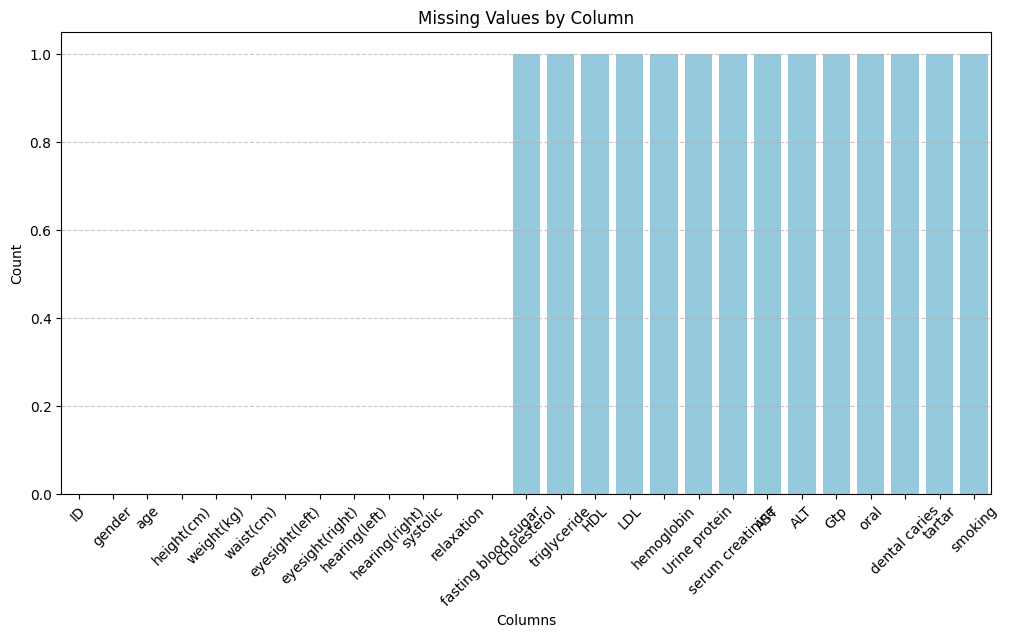

In [3]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, color='skyblue')
plt.title("Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [4]:
# Impute missing numerical values with the mean
imputer = SimpleImputer(strategy='mean')
df[df.select_dtypes(include=['number']).columns] = imputer.fit_transform(df.select_dtypes(include=['number']))

# Verify missing values handled
print("Total missing values after imputation:", df.isnull().sum().sum())


Total missing values after imputation: 2


In [5]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Merge encoded data back into the dataset
df = pd.concat([df.drop(columns=categorical_cols), encoded_data], axis=1)

print("Categorical columns encoded successfully.")


Categorical columns encoded successfully.


In [6]:
# Scale numerical features for uniformity
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Numerical features scaled successfully.")


Numerical features scaled successfully.


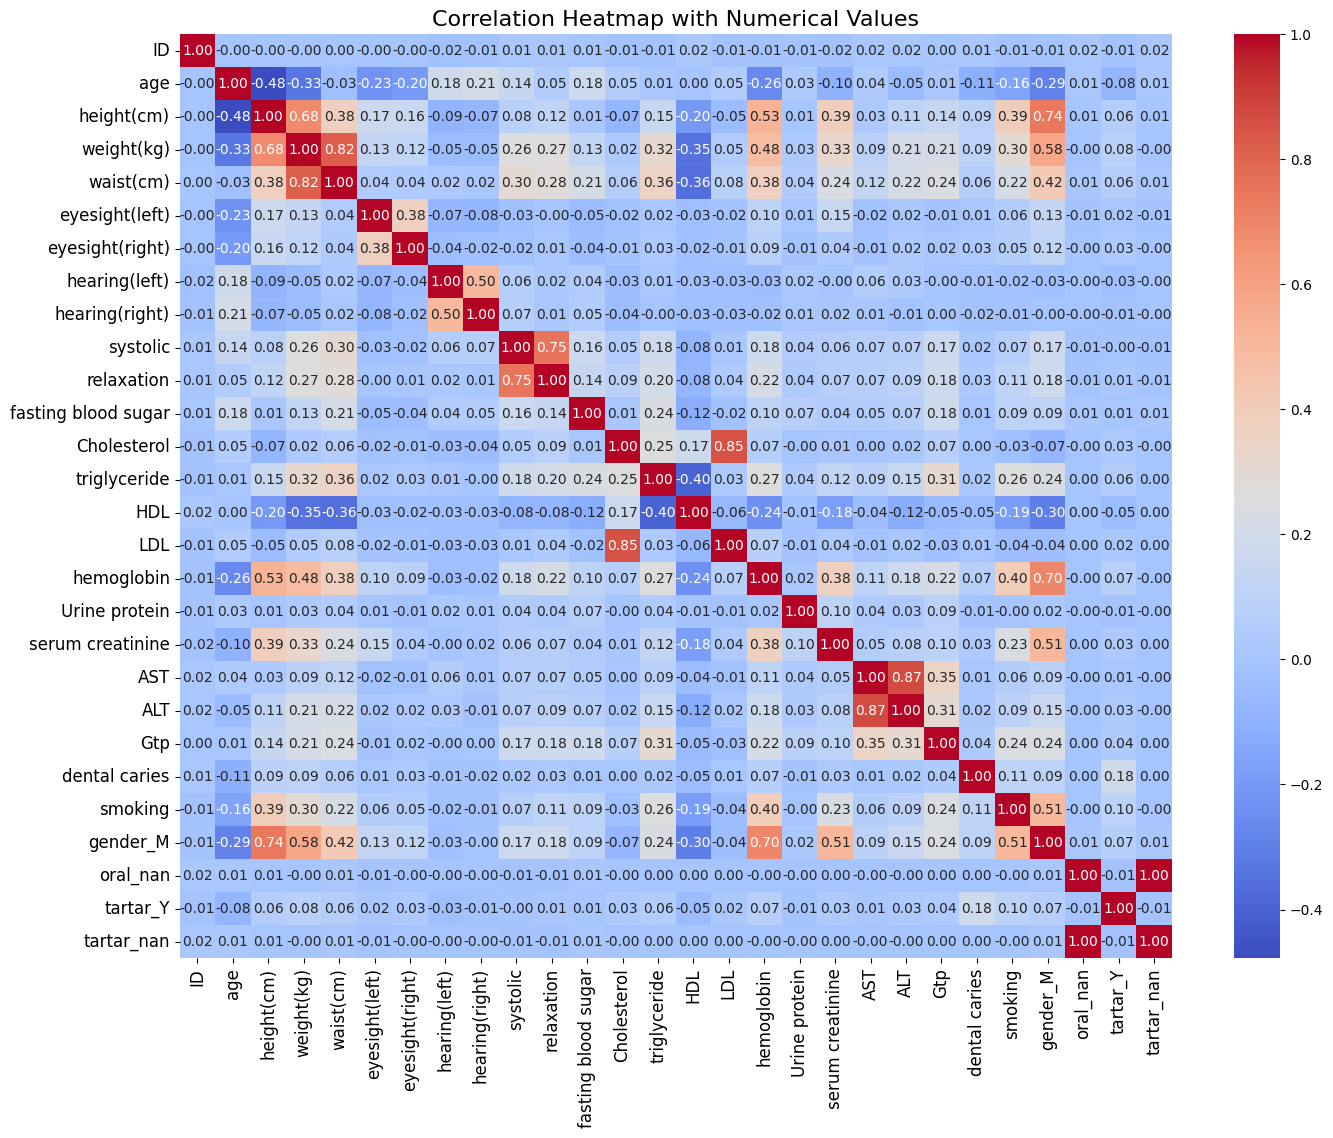

In [7]:
# Generate correlation heatmap with numerical values
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 10})
plt.title("Correlation Heatmap with Numerical Values", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("correlation_heatmap_with_values.png", dpi=300)
plt.show()


BMI column created successfully.


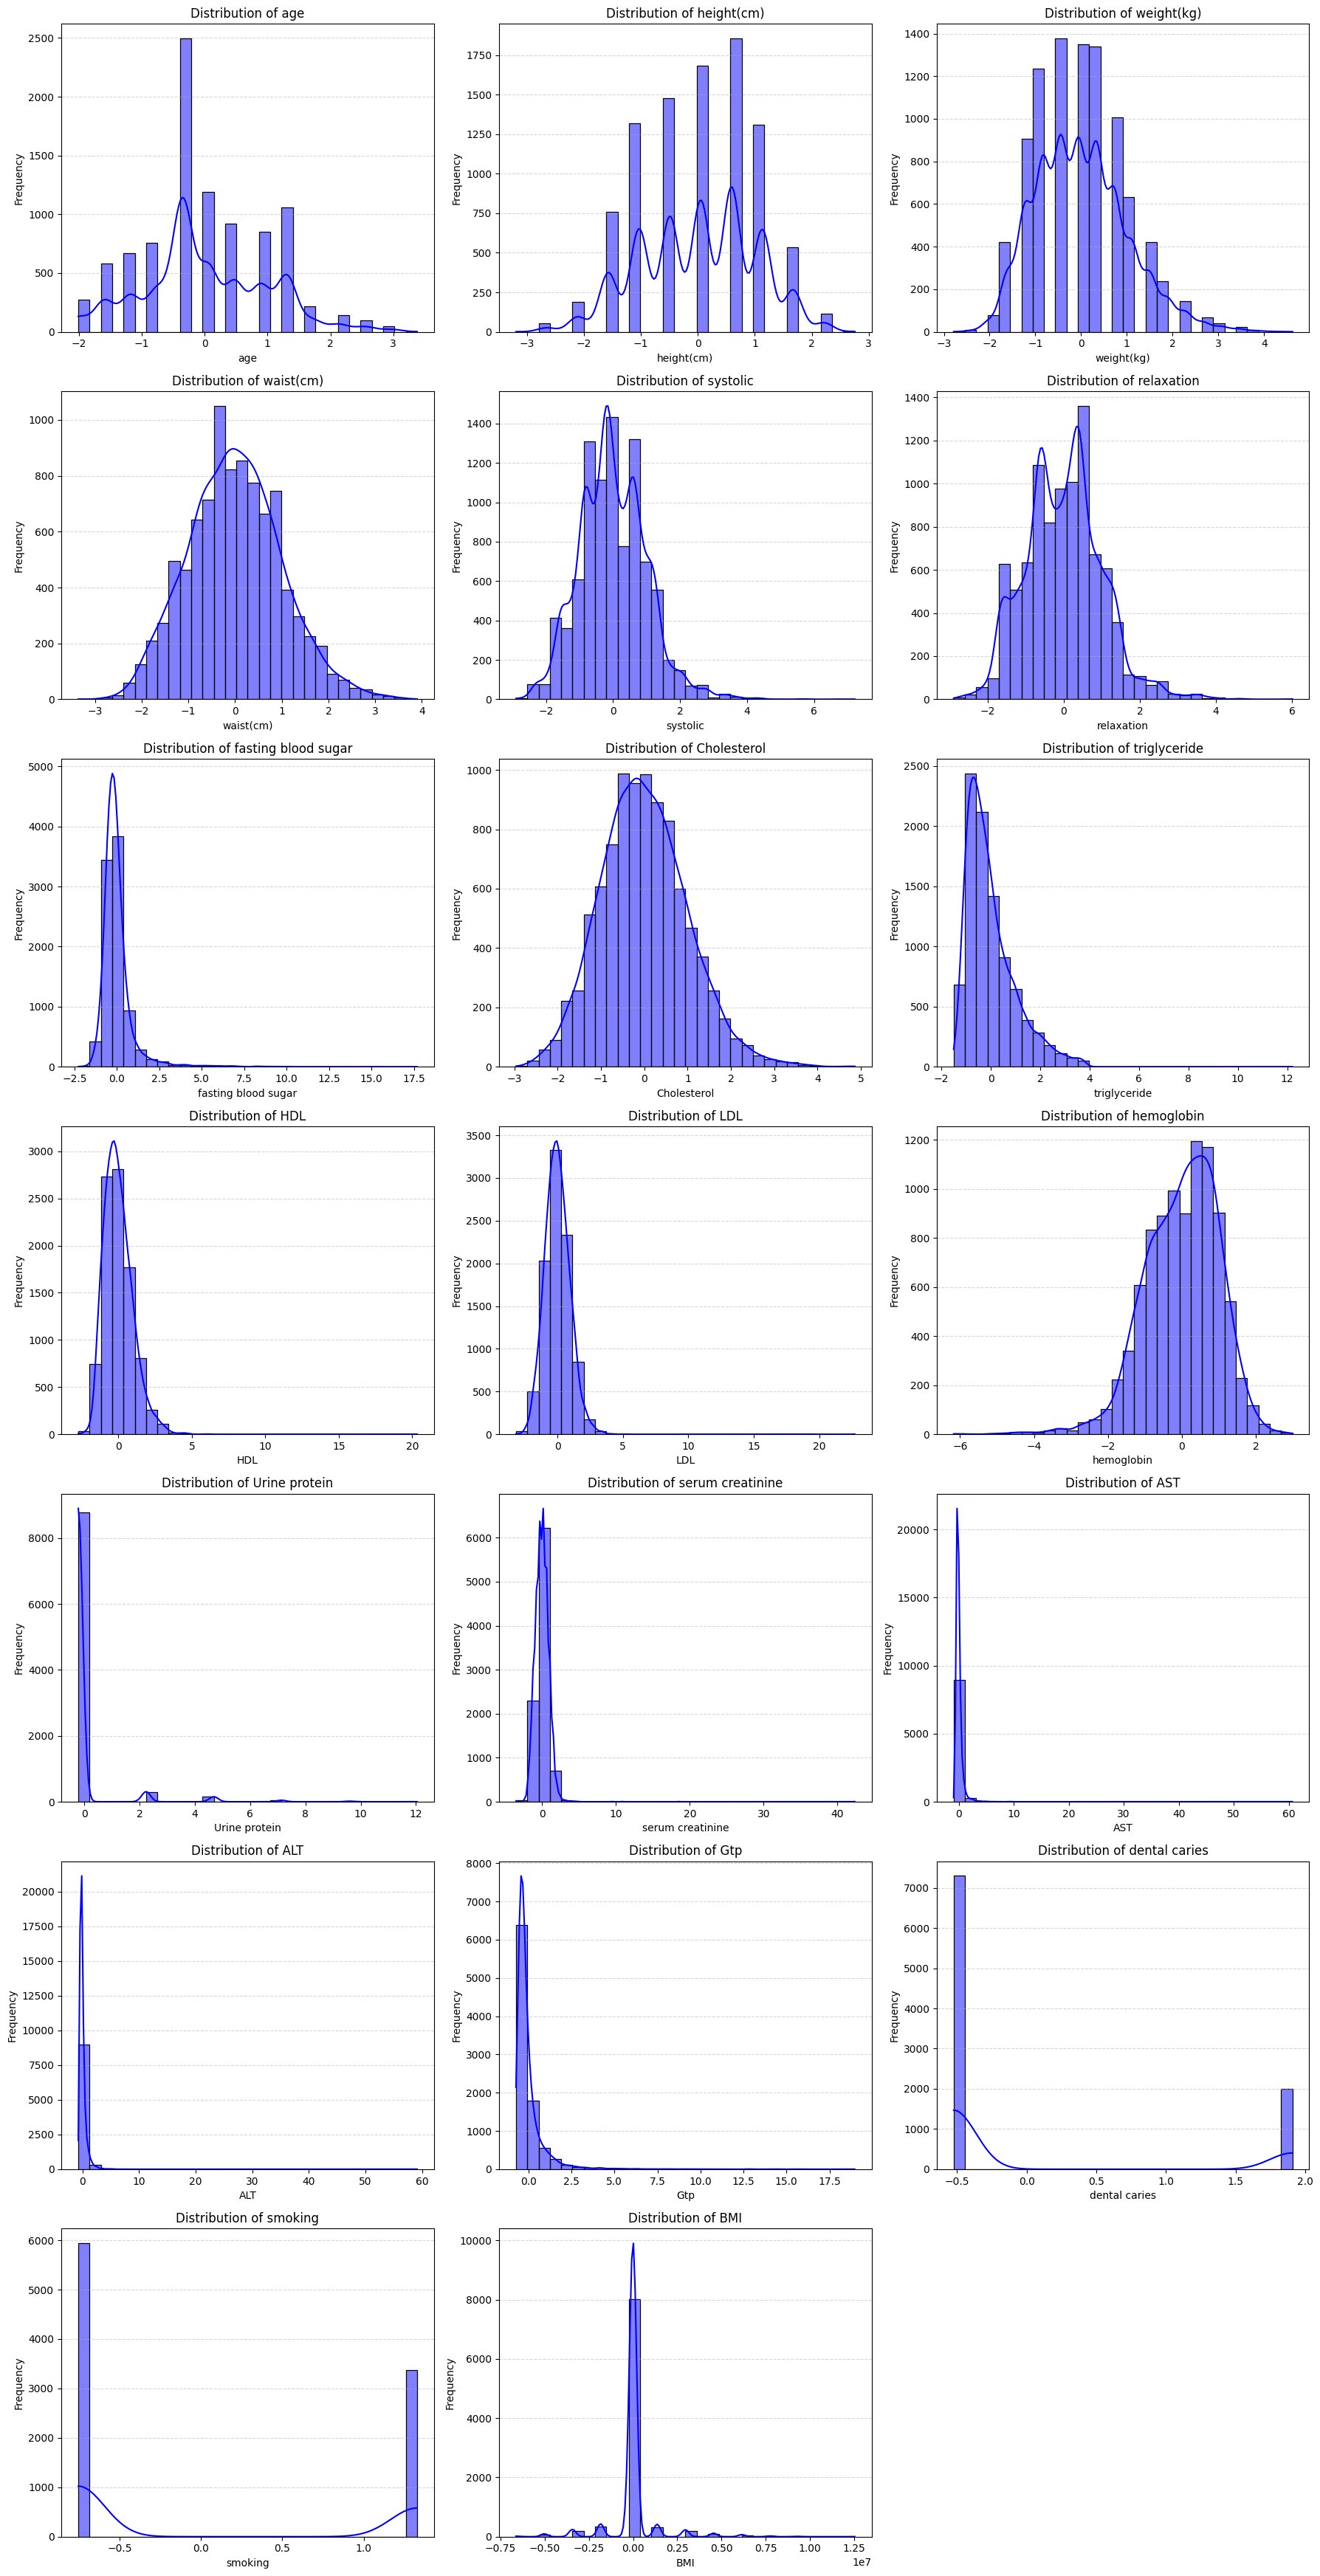

In [8]:
import math

# Ensure BMI is calculated
if 'BMI' not in df.columns:
    df['BMI'] = df['weight(kg)'] / (df['height(cm)'] / 100) ** 2
    print("BMI column created successfully.")

# List of columns to analyze (excluding specified ones)
columns_to_analyze = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'relaxation',
    'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
    'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp',
     'dental caries',  'smoking', 'BMI'
]

# Number of features and grid layout
num_features = len(columns_to_analyze)
cols = 3  # Number of columns in the grid
rows = math.ceil(num_features / cols)  # Determine the number of rows

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()  # Flatten the grid of axes for easy iteration

# Plot each feature's histogram
for i, feature in enumerate(columns_to_analyze):
    sns.histplot(df[feature], kde=True, bins=30, color='blue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("all_feature_histograms.png", dpi=300)
plt.show()


Generating pairplot for group 1: ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic']


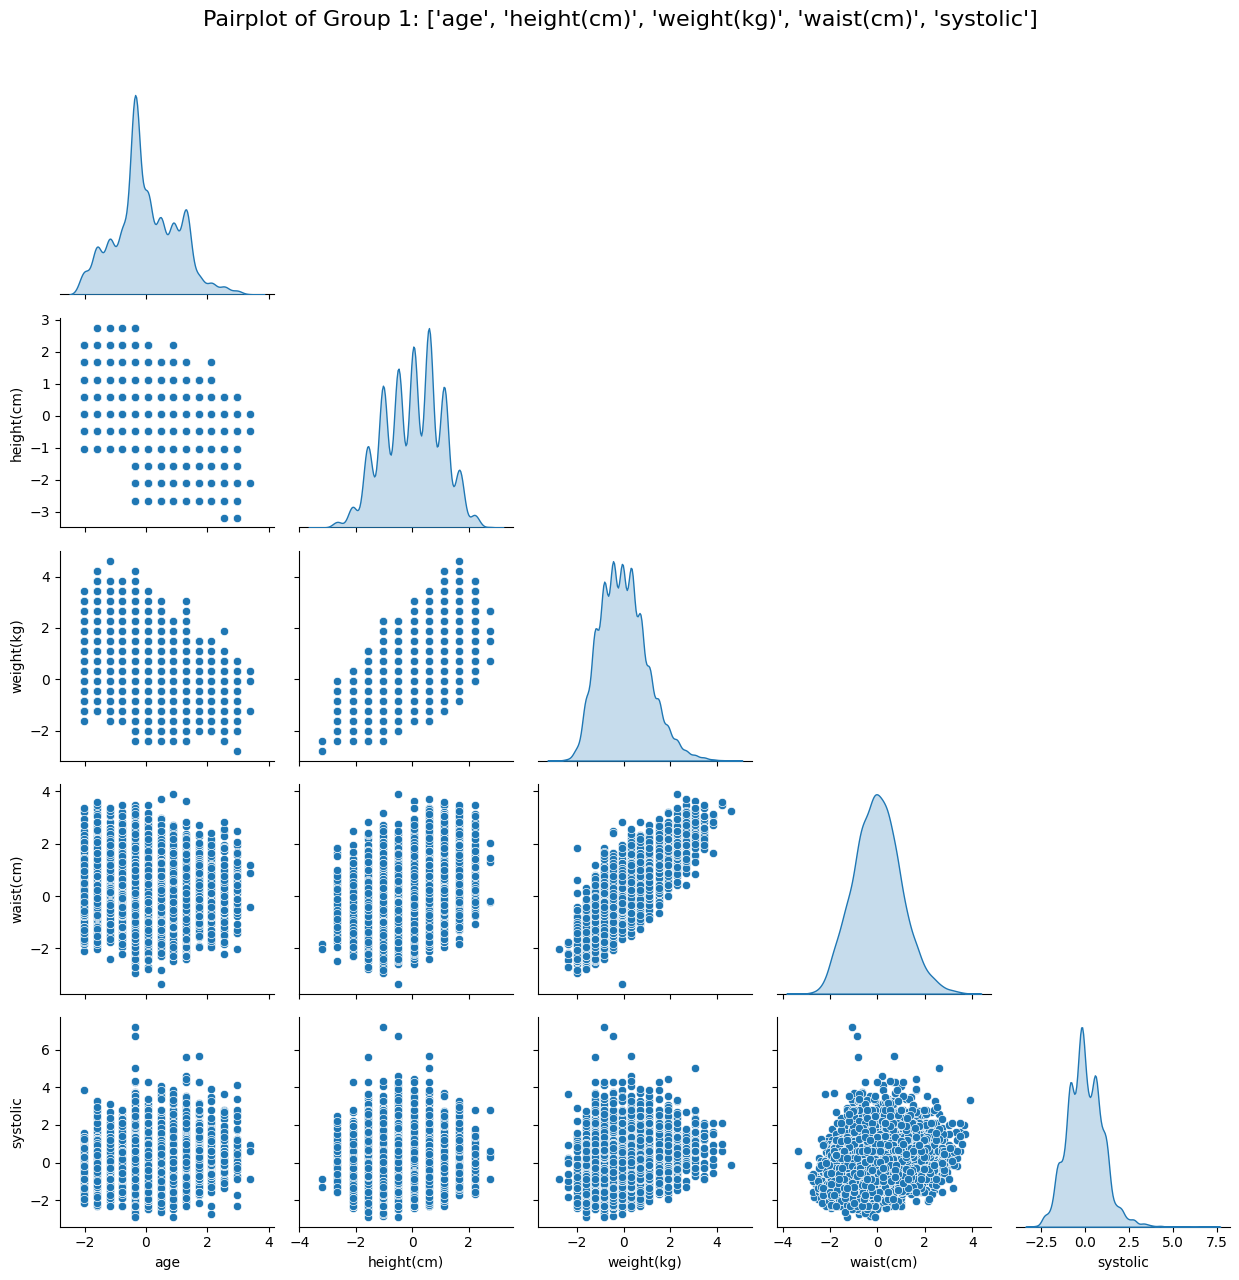

Generating pairplot for group 2: ['relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL']


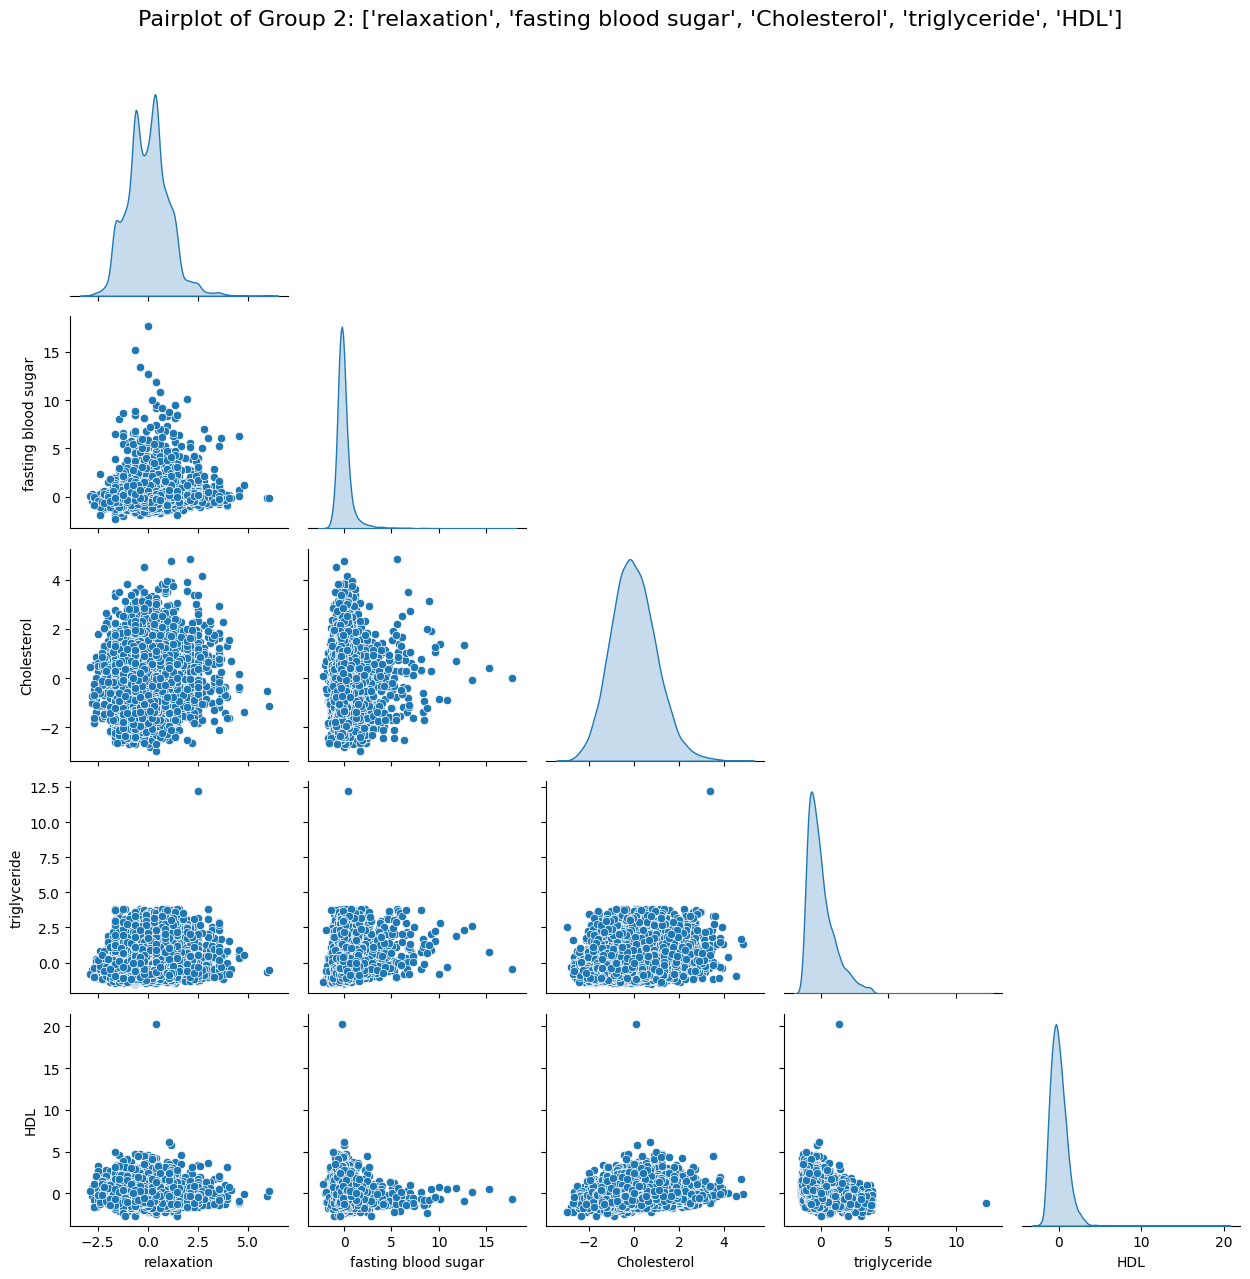

Generating pairplot for group 3: ['LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST']


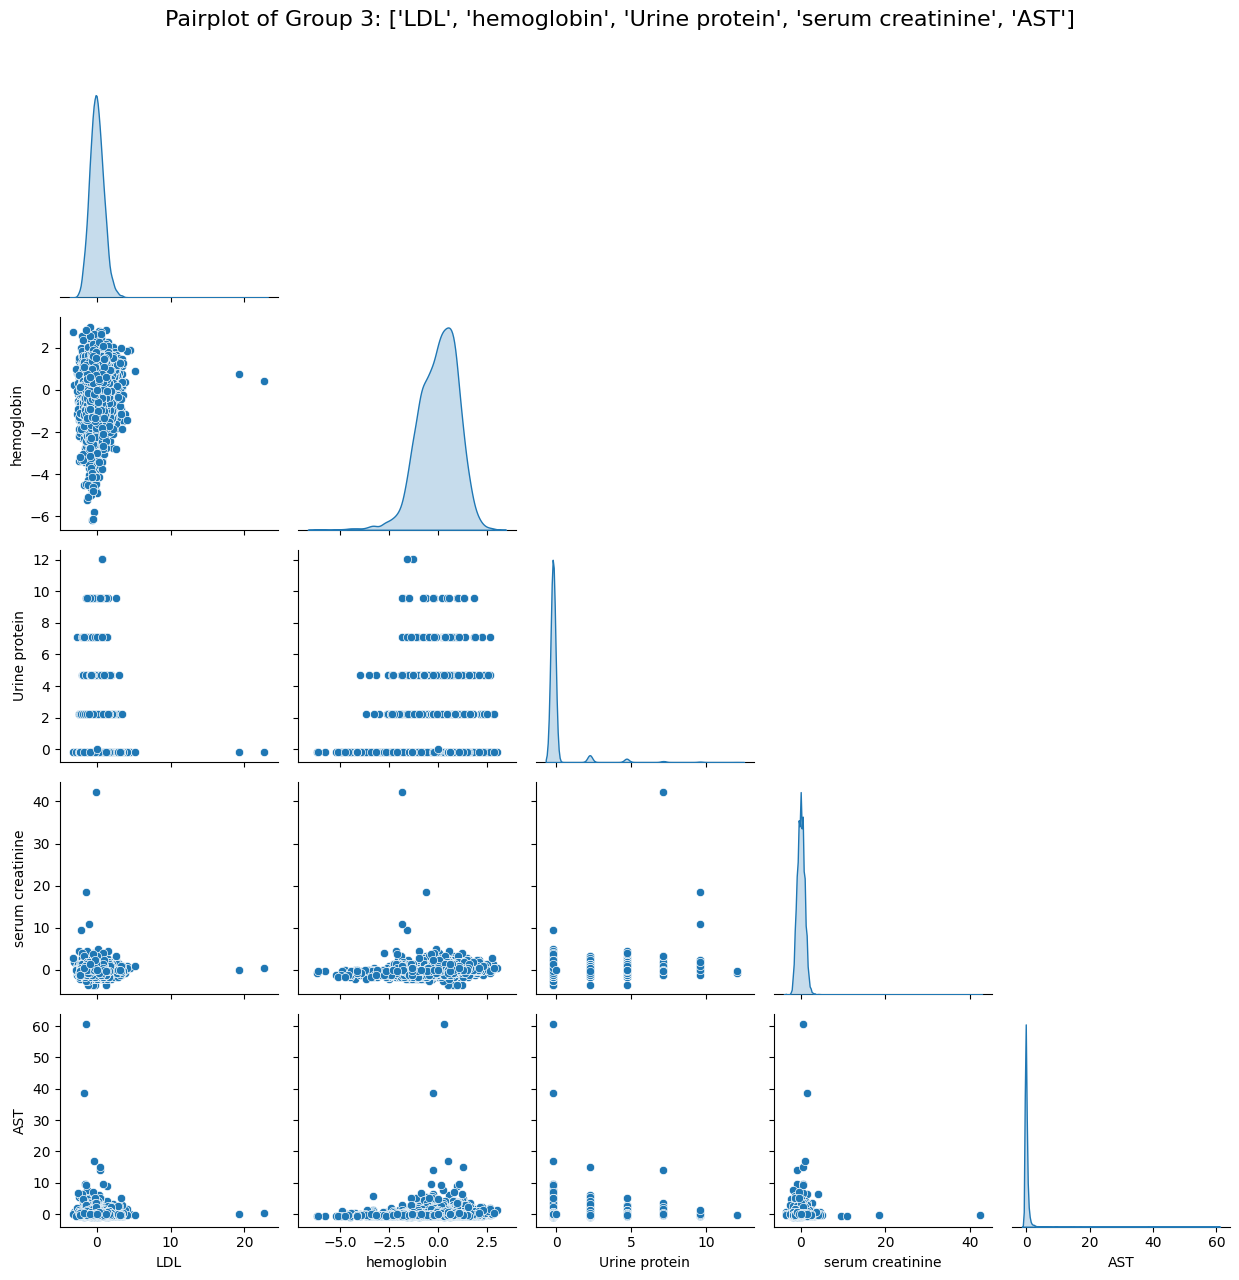

Generating pairplot for group 4: ['ALT', 'Gtp', 'dental caries', 'smoking', 'BMI']


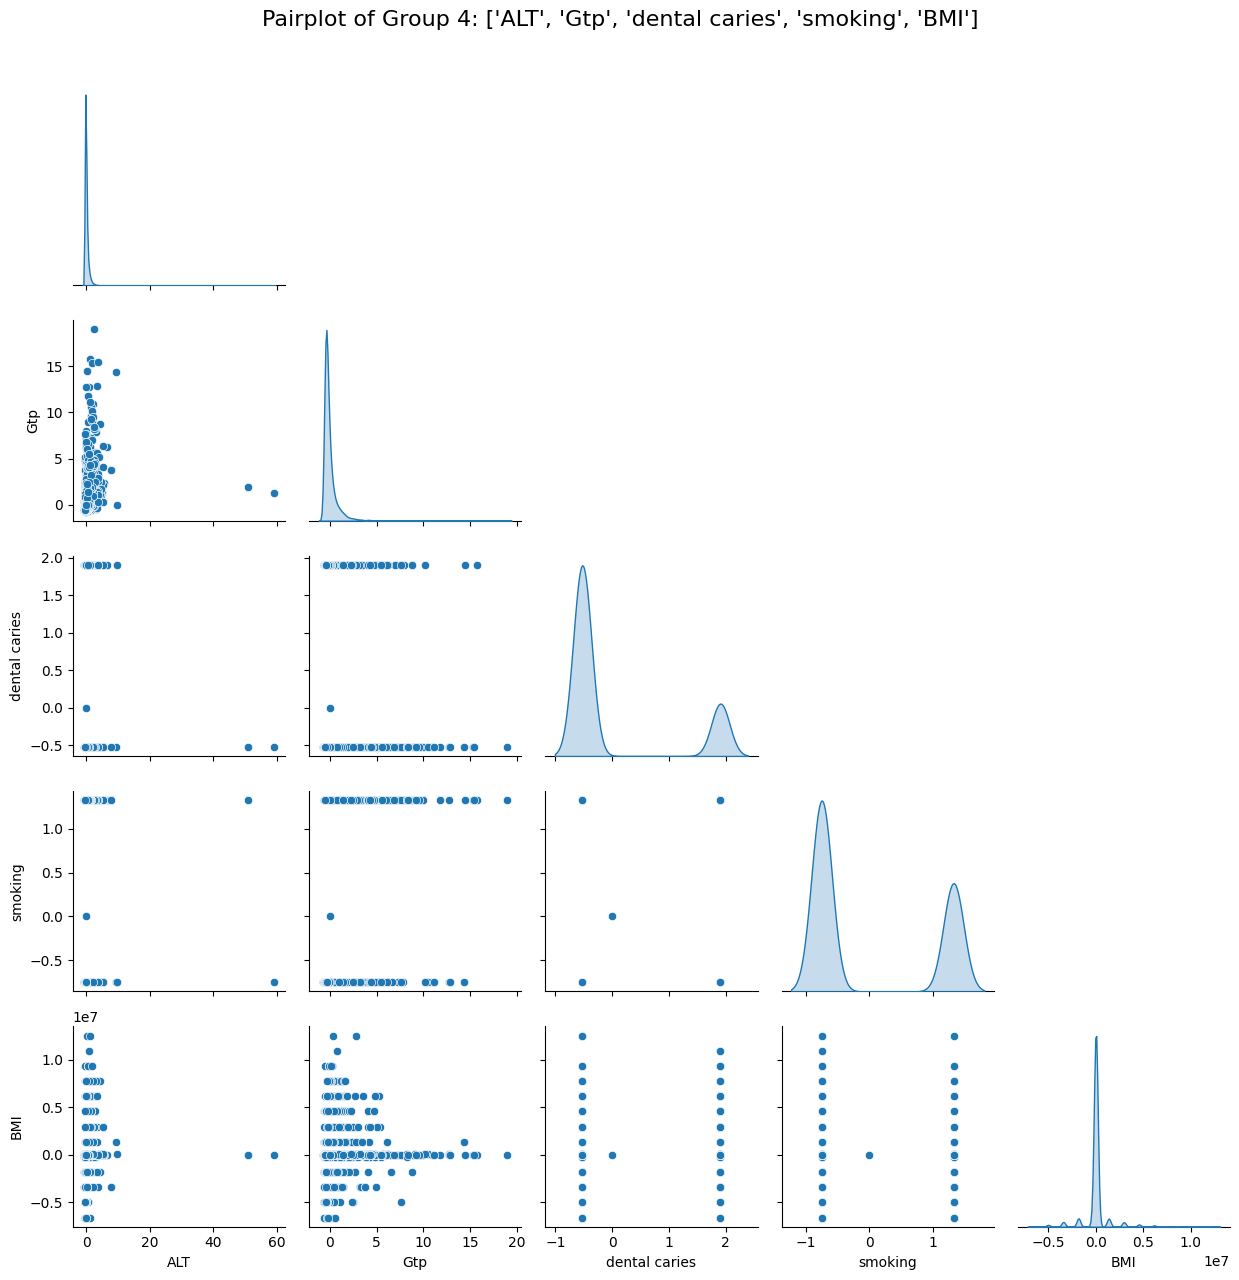

In [9]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to analyze (excluding specified ones)
columns_to_analyze = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'relaxation',
    'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
    'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp',
    'dental caries', 'smoking', 'BMI'
]

# Number of features per pairplot (smaller groups for better visualization)
group_size = 5

# Divide columns into groups of size 'group_size'
groups = [columns_to_analyze[i:i + group_size] for i in range(0, len(columns_to_analyze), group_size)]

# Generate pairplots for each group
for idx, group in enumerate(groups):
    print(f"Generating pairplot for group {idx + 1}: {group}")
    sns.pairplot(df[group], diag_kind='kde', corner=True)
    plt.suptitle(f"Pairplot of Group {idx + 1}: {group}", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.savefig(f"pairplot_group_{idx + 1}.png", dpi=300)
    plt.show()


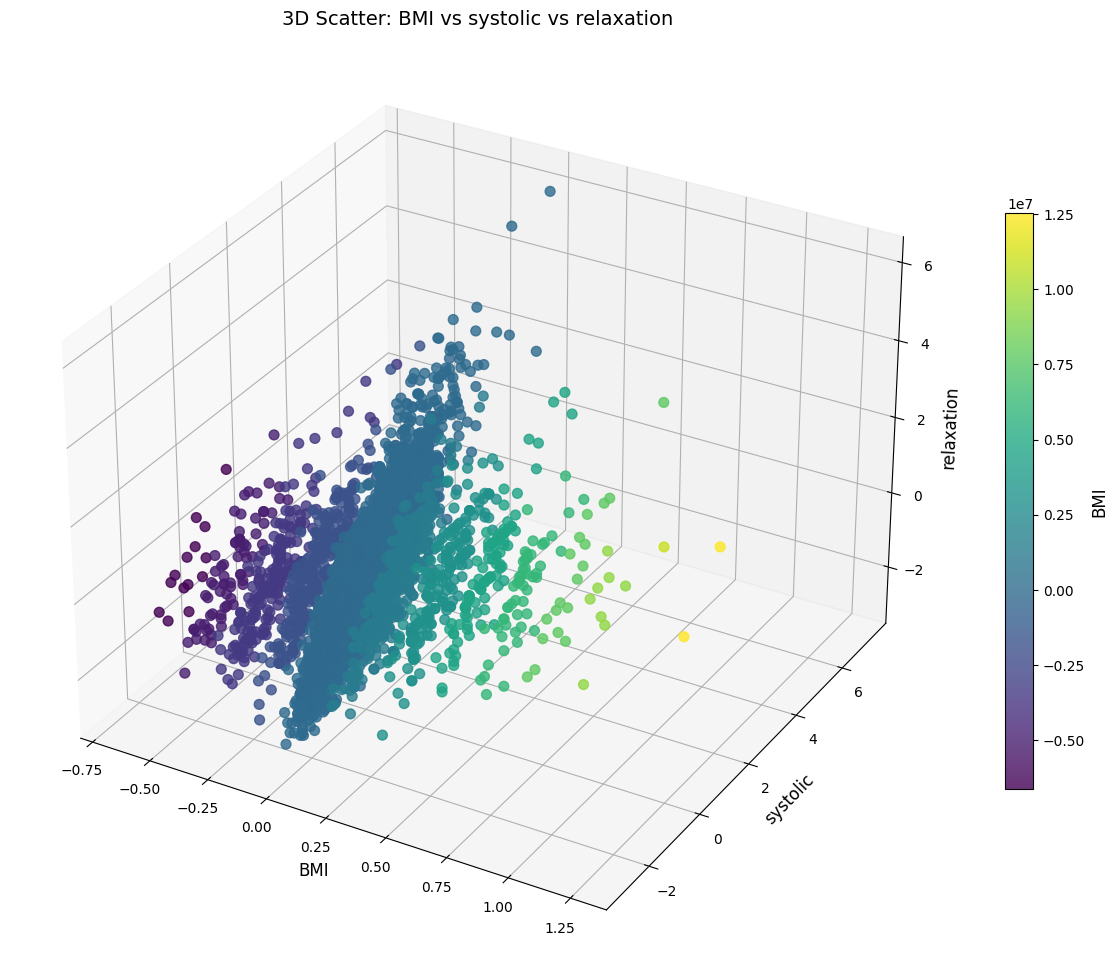

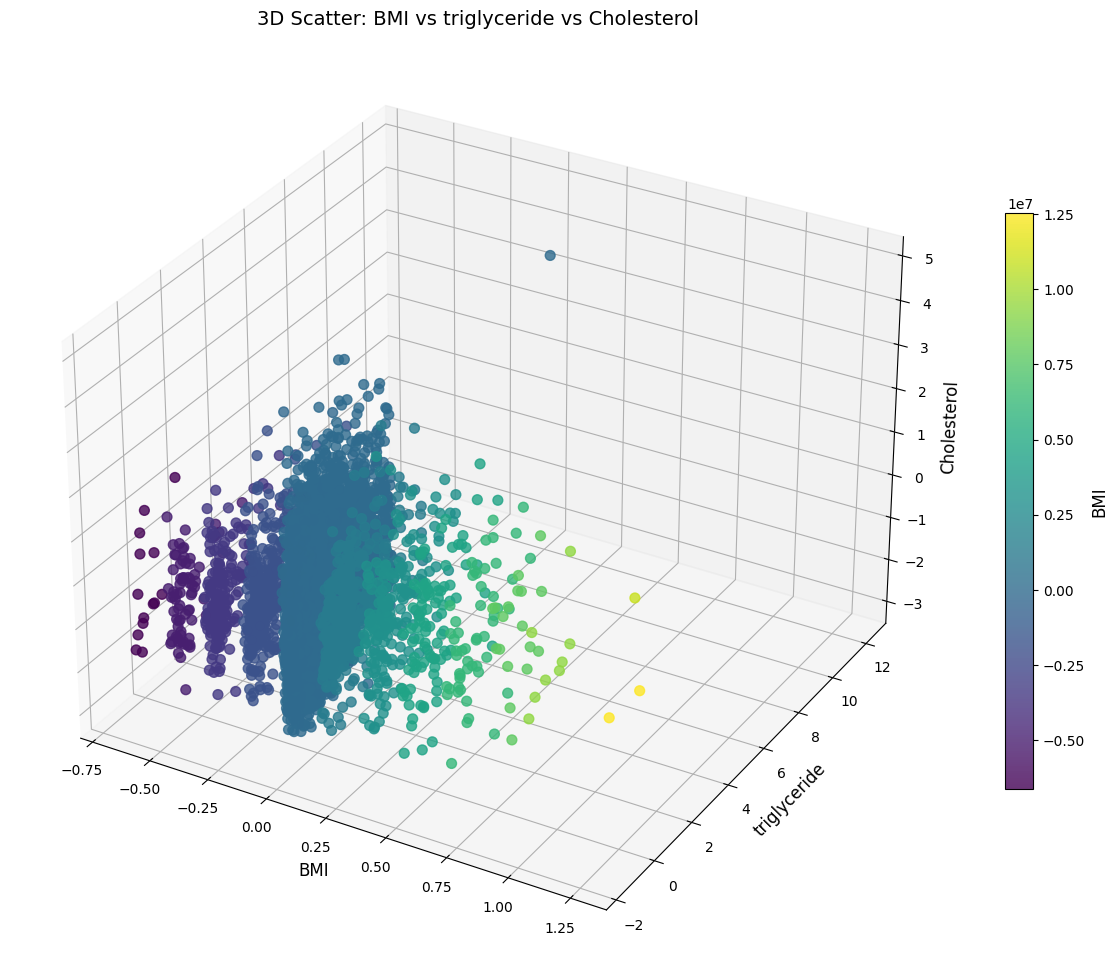

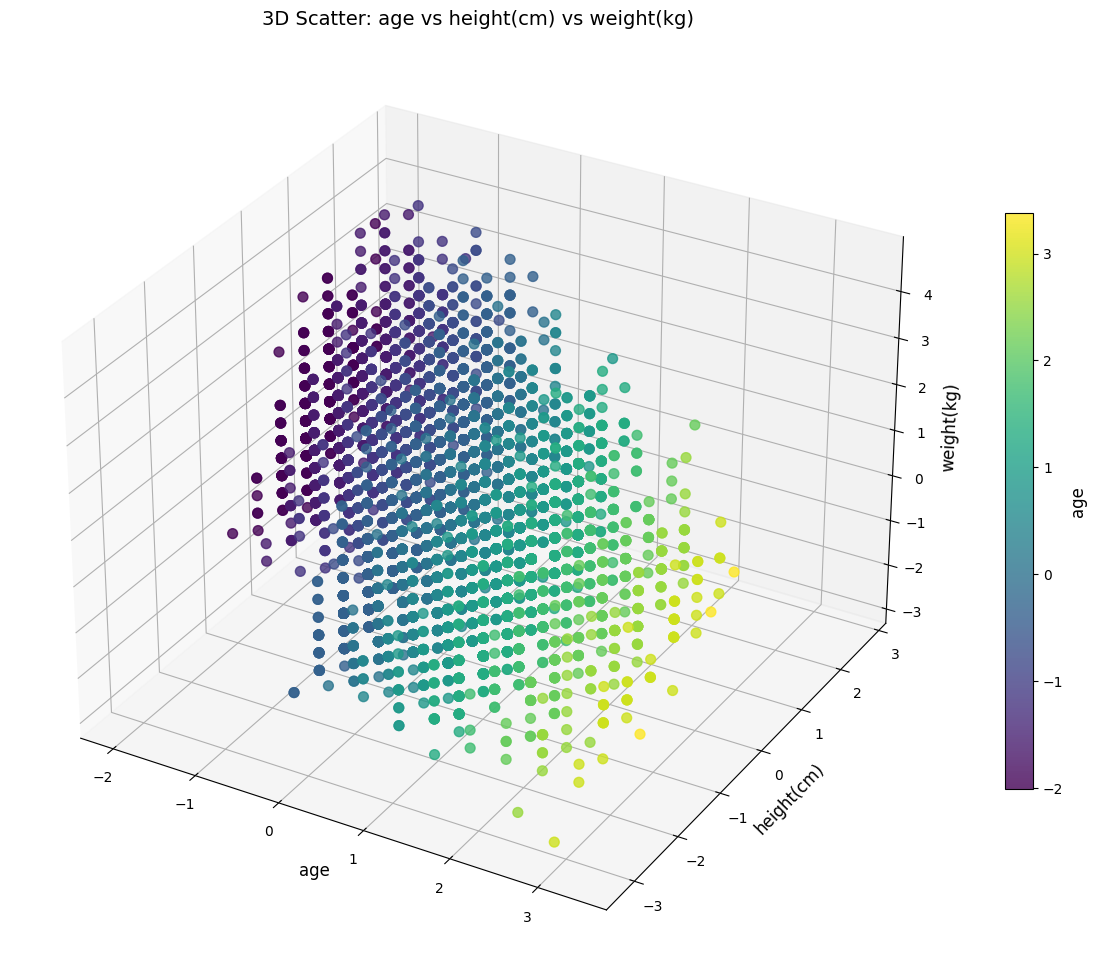

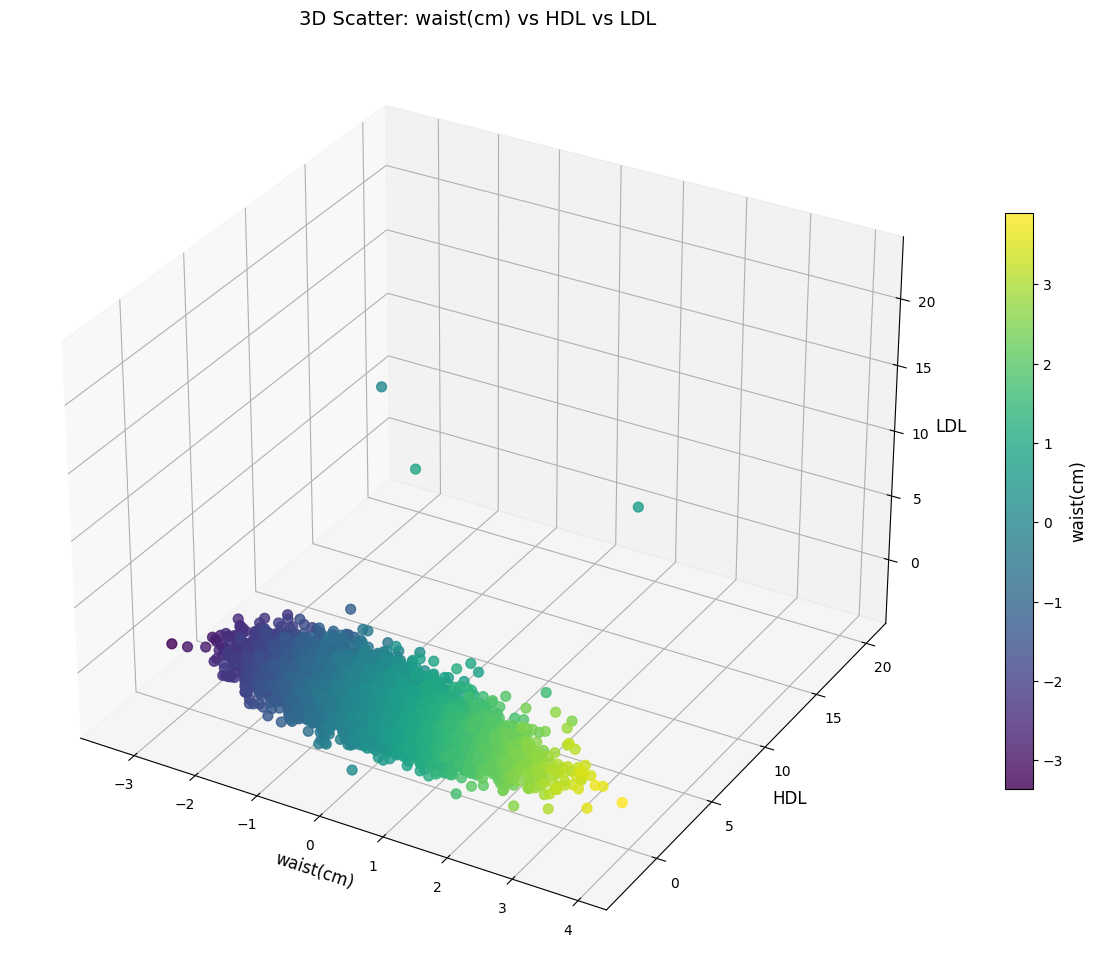

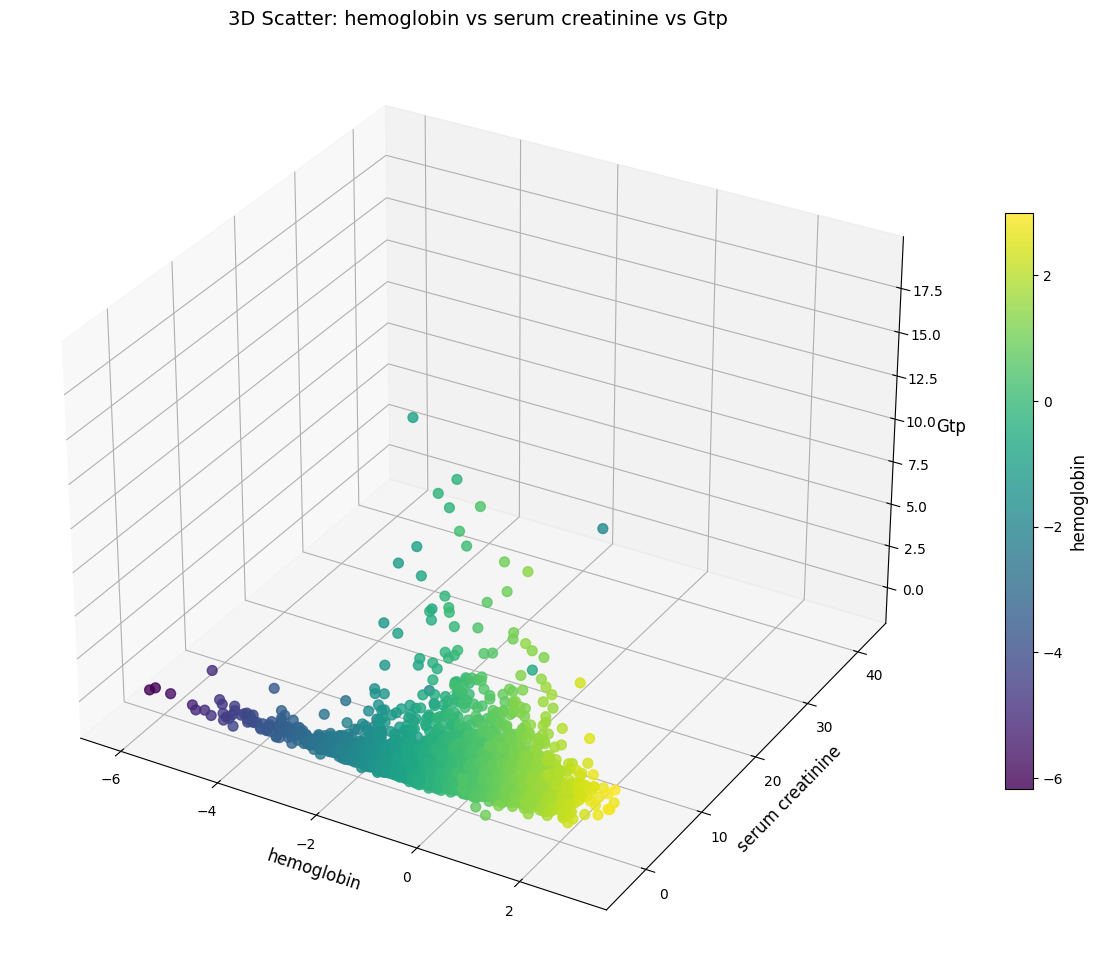

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Define important feature combinations for 3D scatter plots
feature_combinations = [
    ('BMI', 'systolic', 'relaxation'),  # Combination 1
    ('BMI', 'triglyceride', 'Cholesterol'),  # Combination 2
    ('age', 'height(cm)', 'weight(kg)'),  # Combination 3
    ('waist(cm)', 'HDL', 'LDL'),  # Combination 4
    ('hemoglobin', 'serum creatinine', 'Gtp')  # Combination 5
]

# Generate 3D scatter plots for each combination
for idx, (x_feature, y_feature, z_feature) in enumerate(feature_combinations):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot
    sc = ax.scatter(df[x_feature], df[y_feature], df[z_feature], 
                    c=df[x_feature], cmap='viridis', s=50, alpha=0.8)
    
    # Setting labels
    ax.set_xlabel(x_feature, fontsize=12)
    ax.set_ylabel(y_feature, fontsize=12)
    ax.set_zlabel(z_feature, fontsize=12)
    plt.title(f"3D Scatter: {x_feature} vs {y_feature} vs {z_feature}", fontsize=14)
    
    # Add colorbar
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6)
    cbar.set_label(x_feature, fontsize=12)
    
    # Show and save plot
    plt.tight_layout()
    plt.savefig(f"3d_scatter_{x_feature}_vs_{y_feature}_vs_{z_feature}.png", dpi=300)
    plt.show()


In [11]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np

# Preparing the dataset
# Replace 'smoking' with the actual target column name if different
X = df.drop(columns=['smoking'])  
y = df['smoking']

# Scale the features for LASSO to work effectively
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adjust alpha to ensure at least 15 features are selected
lasso = Lasso(alpha=0.01, random_state=42)  # Use a smaller alpha for less regularization
lasso.fit(X_scaled, y)

# Select important features (non-zero coefficients)
lasso_features = X.columns[np.where(lasso.coef_ != 0)]

# Ensure at least 15 features
if len(lasso_features) < 15:
    # Sort features by coefficient magnitude and select the top 15
    top_features_indices = np.argsort(np.abs(lasso.coef_))[-15:]
    lasso_features = X.columns[top_features_indices]

print("Important Features from LASSO:")
print(list(lasso_features))


Important Features from LASSO:
['height(cm)', 'waist(cm)', 'systolic', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'gender_M', 'tartar_Y', 'BMI']


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df.drop(columns=columns_to_drop, inplace=True)

# Drop rows where target is missing
df = df.dropna(subset=['smoking'])

# Define target and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# Define preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess features
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

# Convert target to numpy for Keras
y_train_keras = np.array(y_train)
y_test_keras = np.array(y_test)

# Deep learning model
input_dim = X_train.shape[1]
deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the deep model
deep_model.fit(X_train, y_train_keras, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Extract features from penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Train XGBoost on deep features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_features, y_train)

# Feature importances and normal ranges
feature_importances = xgb_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()

normal_ranges = {}
outliers = {}
for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    lower, upper = mean - 1.96 * std, mean + 1.96 * std
    normal_ranges[col] = (lower, upper)
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)]

# Penalty calculation
penalties = {}
for col in numeric_cols:
    for idx, value in outliers[col][col].items():
        distance = min(abs(value - normal_ranges[col][0]), abs(value - normal_ranges[col][1]))
        penalties[idx] = penalties.get(idx, 0) + distance

# Display results
print("Feature Importances (Normalized):")
for col, weight in zip(numeric_cols, normalized_weights):
    print(f"{col}: {weight:.4f} (Normal Range: {normal_ranges[col]})")

print("\nPenalties for Outliers (Sample):")
print({k: penalties[k] for k in list(penalties.keys())[:5]})

# Final model evaluation
y_pred = xgb_model.predict(X_test_features)
print("\nCombined Deep Learning + XGBoost Metrics:")
print(classification_report(y_test, y_pred))


Epoch 1/10
163/163 [==============================] - 2s 5ms/step - loss: 0.5177 - accuracy: 0.7087 - val_loss: 0.4775 - val_accuracy: 0.7429
Epoch 2/10
163/163 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7527 - val_loss: 0.4666 - val_accuracy: 0.7521
Epoch 3/10
163/163 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.7558 - val_loss: 0.4680 - val_accuracy: 0.7513
Epoch 4/10
163/163 [==============================] - 1s 3ms/step - loss: 0.4538 - accuracy: 0.7669 - val_loss: 0.4670 - val_accuracy: 0.7575
Epoch 5/10
163/163 [==============================] - 1s 3ms/step - loss: 0.4449 - accuracy: 0.7694 - val_loss: 0.4837 - val_accuracy: 0.7421
Epoch 6/10
163/163 [==============================] - 0s 3ms/step - loss: 0.4362 - accuracy: 0.7801 - val_loss: 0.4806 - val_accuracy: 0.7590
Epoch 7/10
163/163 [==============================] - 1s 3ms/step - loss: 0.4341 - accuracy: 0.7792 - val_loss: 0.4955 - val_accuracy: 0.7437
Epoch 

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Drop rows where target is missing
df = df.dropna(subset=['smoking'])

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Remove rows with missing values in features or target after processing (if any)
X_processed = pd.DataFrame(X_processed).dropna().values
y = y.reset_index(drop=True).iloc[:X_processed.shape[0]]  # Align y with X

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Convert target variable for Keras
y_train_keras = np.array(y_train)
y_test_keras = np.array(y_test)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]

deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
deep_model.fit(X_train, y_train_keras, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train XGBoost on Extracted Features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_features, y_train)

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Normalize weights
normalized_weights = feature_importances / feature_importances.sum()

# Step 3: Define Normal Ranges and Identify Outliers
normal_ranges = {}
outliers = {}

for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    normal_range = (mean - 1.96 * std, mean + 1.96 * std)
    normal_ranges[col] = normal_range
    outliers[col] = df[(df[col] < normal_range[0]) | (df[col] > normal_range[1])]

# Step 4: Apply Penalties for Outliers
penalties = {}

for col in numeric_cols:
    penalty_factor = 1  # Default penalty factor
    for idx, value in outliers[col][col].items():
        distance_from_normal = min(abs(value - normal_ranges[col][0]), abs(value - normal_ranges[col][1]))
        penalty = penalty_factor * distance_from_normal
        penalties[idx] = penalties.get(idx, 0) + penalty

# Display results
print("Feature Importances (Normalized):")
for col, weight in zip(numeric_cols, normalized_weights):
    print(f"{col}: {weight:.4f} (Normal Range: {normal_ranges[col]})")

print("\nPenalties for Outliers (Sample):")
print({k: penalties[k] for k in list(penalties.keys())[:5]})  # Display sample penalties

# Step 5: Evaluate Combined Model
y_pred = xgb_model.predict(X_test_features)
print("\nCombined Deep Learning + XGBoost Metrics:")
print(classification_report(y_test, y_pred))


Epoch 1/10
163/163 [==============================] - 2s 5ms/step - loss: 0.5095 - accuracy: 0.7076 - val_loss: 0.5079 - val_accuracy: 0.7260
Epoch 2/10
163/163 [==============================] - 1s 5ms/step - loss: 0.4697 - accuracy: 0.7548 - val_loss: 0.5072 - val_accuracy: 0.7368
Epoch 3/10
163/163 [==============================] - 1s 4ms/step - loss: 0.4591 - accuracy: 0.7598 - val_loss: 0.5105 - val_accuracy: 0.7322
Epoch 4/10
163/163 [==============================] - 1s 3ms/step - loss: 0.4543 - accuracy: 0.7634 - val_loss: 0.5097 - val_accuracy: 0.7237
Epoch 5/10
163/163 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.7698 - val_loss: 0.5052 - val_accuracy: 0.7444
Epoch 6/10
163/163 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.7732 - val_loss: 0.5068 - val_accuracy: 0.7475
Epoch 7/10
163/163 [==============================] - 1s 3ms/step - loss: 0.4302 - accuracy: 0.7886 - val_loss: 0.5155 - val_accuracy: 0.7375
Epoch 

Epoch 1/30
163/163 [==============================] - 2s 5ms/step - loss: 0.5261 - accuracy: 0.7041 - val_loss: 0.4663 - val_accuracy: 0.7506
Epoch 2/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7490 - val_loss: 0.4596 - val_accuracy: 0.7483
Epoch 3/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.7615 - val_loss: 0.4617 - val_accuracy: 0.7521
Epoch 4/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7711 - val_loss: 0.4648 - val_accuracy: 0.7513
Epoch 5/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.7730 - val_loss: 0.4723 - val_accuracy: 0.7414
Epoch 6/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.7813 - val_loss: 0.4653 - val_accuracy: 0.7475
Epoch 7/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.7897 - val_loss: 0.4712 - val_accuracy: 0.7329
Epoch 

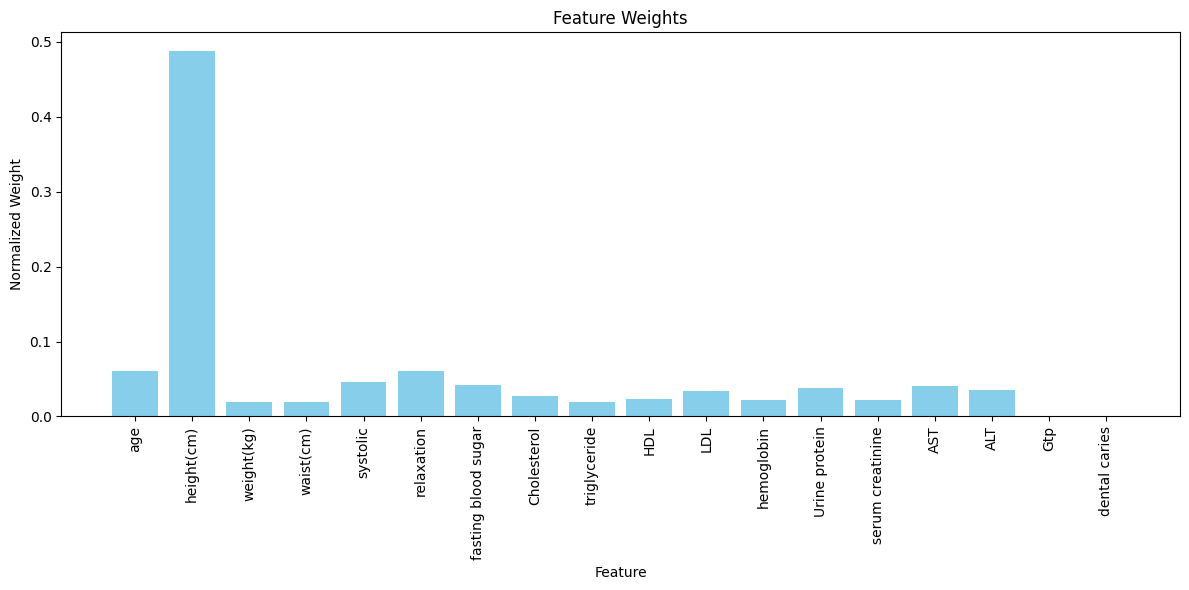

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop rows where target is NaN
df = df.dropna(subset=['smoking'])

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Process features
X_processed = preprocessor.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

# Convert target for Keras
y_train_keras = np.array(y_train)
y_test_keras = np.array(y_test)

# Step 1: Deep learning model
input_dim = X_train.shape[1]
deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
deep_model.fit(X_train, y_train_keras, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Extract penultimate layer features
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: XGBoost on extracted features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_features, y_train)

# Step 3: Normalize feature importance
feature_importances = xgb_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0

# Step 4: Calculate normal ranges and penalties
normal_ranges = {}
outliers = {}
for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    lower, upper = mean - 1.96 * std, mean + 1.96 * std
    normal_ranges[col] = (lower, upper)
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)]

penalties = {}
for col in numeric_cols:
    for idx, value in outliers[col][col].items():
        distance = min(abs(value - normal_ranges[col][0]), abs(value - normal_ranges[col][1]))
        penalties[idx] = penalties.get(idx, 0) + distance

# Step 5: Health score formula
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        penalty = penalties.get(row.name, 0)
        if normal_ranges[col][0] <= value <= normal_ranges[col][1]:
            score += value * weight
        else:
            score += (value - penalty) * weight
    return max(1, min(100, score))

df['health_score'] = df.apply(calculate_health_score, axis=1)

# Step 6: Tabular results
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [normal_ranges[col] for col in numeric_cols]
})
print("Feature Weights and Ranges:")
print(results)

# Step 7: Final classification report
y_pred = xgb_model.predict(X_test_features)
print("\nCombined Deep Learning + XGBoost Metrics:")
print(classification_report(y_test, y_pred))

# Save results and plot
results.to_csv("feature_weights_and_ranges.csv", index=False)
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.savefig("feature_weights.png")
plt.show()


Epoch 1/30
163/163 [==============================] - 1s 4ms/step - loss: 0.5238 - accuracy: 0.7083 - val_loss: 0.4680 - val_accuracy: 0.7467
Epoch 2/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.7575 - val_loss: 0.4655 - val_accuracy: 0.7452
Epoch 3/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.7567 - val_loss: 0.4809 - val_accuracy: 0.7406
Epoch 4/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7663 - val_loss: 0.4754 - val_accuracy: 0.7329
Epoch 5/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.7707 - val_loss: 0.4719 - val_accuracy: 0.7452
Epoch 6/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4407 - accuracy: 0.7755 - val_loss: 0.4790 - val_accuracy: 0.7490
Epoch 7/30
163/163 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.7840 - val_loss: 0.4816 - val_accuracy: 0.7475
Epoch 

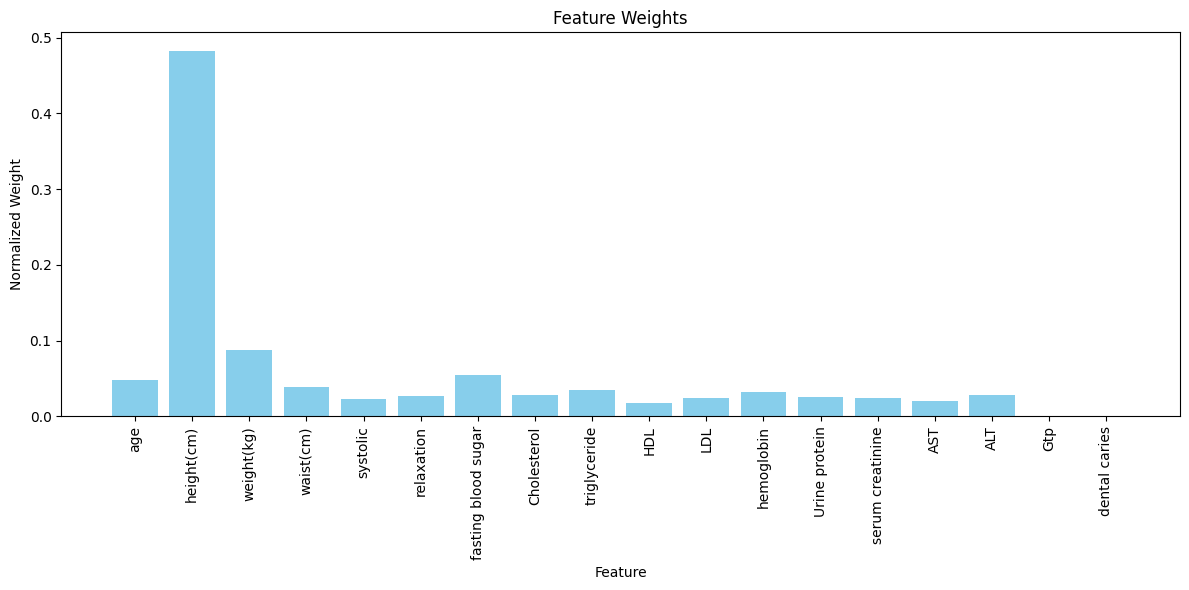

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop rows with missing target values
df = df.dropna(subset=['smoking'])

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Convert target variable for Keras
y_train_keras = np.array(y_train)
y_test_keras = np.array(y_test)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]

deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = deep_model.fit(
    X_train, y_train_keras,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train XGBoost on Extracted Features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_features, y_train)

# Get feature importances and normalize them
feature_importances = xgb_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}

# Handle columns not included in the mapped weights
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0

# Step 3.1: Define normal ranges for all numeric columns
normal_ranges = {}
for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    lower = mean - 1.96 * std
    upper = mean + 1.96 * std
    normal_ranges[col] = (lower, upper)

# Step 3.2: Define threshold-based penalty bands
thresholds = {
    'Cholesterol': [(0, 200), (200, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (150, 199), (200, 499), (500, float('inf'))],
    'systolic': [(90, 120), (120, 139), (140, float('inf'))],
    'relaxation': [(60, 80), (80, 89), (90, float('inf'))]
}

penalty_factors = {
    'Cholesterol': [0, 0.2, 0.5, 1],
    'triglyceride': [0, 0.3, 0.6, 1],
    'systolic': [0, 0.1, 0.5],
    'relaxation': [0, 0.2, 0.6]
}

def calculate_penalty(value, col):
    for idx, (low, high) in enumerate(thresholds[col]):
        if low <= value <= high:
            return penalty_factors[col][idx]
    return 0

def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        penalty = calculate_penalty(value, col) if col in thresholds else 0
        if normal_ranges[col][0] <= value <= normal_ranges[col][1]:
            score += value * weight
        else:
            score += (value - penalty) * weight
    return max(1, min(100, score))

# Apply health score to the original dataframe
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Prepare feature weights + range summary
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else normal_ranges[col] for col in numeric_cols]
})

print("Feature Weights, Ranges, and Penalties:")
print(results)

# Step 5: Evaluate Combined Model
y_pred = xgb_model.predict(X_test_features)
print("\nCombined Deep Learning + XGBoost Metrics:")
print(classification_report(y_test, y_pred))

# Save outputs
results.to_csv("feature_weights_and_ranges.csv", index=False)

plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.savefig("feature_weights.png")
plt.show()


Epoch 1/20
163/163 [==============================] - 2s 5ms/step - loss: 0.5131 - accuracy: 0.7218 - val_loss: 0.4608 - val_accuracy: 0.7483
Epoch 2/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7506 - val_loss: 0.4565 - val_accuracy: 0.7460
Epoch 3/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.7579 - val_loss: 0.4529 - val_accuracy: 0.7575
Epoch 4/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.7656 - val_loss: 0.4626 - val_accuracy: 0.7398
Epoch 5/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.7732 - val_loss: 0.4592 - val_accuracy: 0.7483
Epoch 6/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.7767 - val_loss: 0.4620 - val_accuracy: 0.7467
Epoch 7/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.7890 - val_loss: 0.4688 - val_accuracy: 0.7475
Epoch 

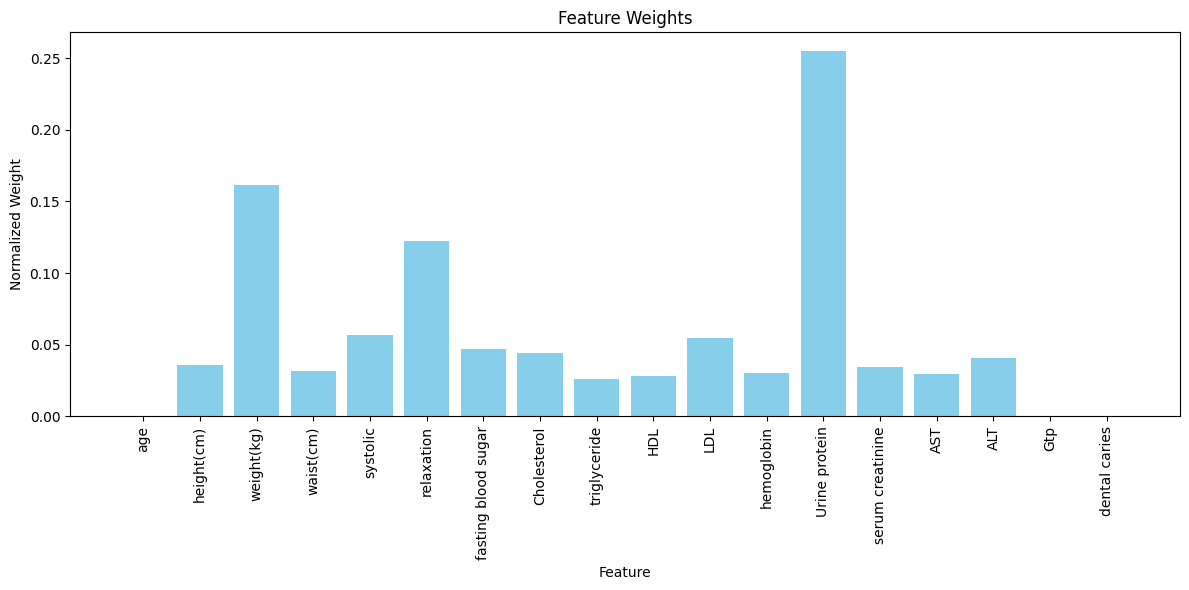

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# ✅ Drop rows with missing target values
df = df.dropna(subset=['smoking'])

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]

deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = deep_model.fit(
    X_train, y_train, 
    epochs=20,  # Adjust as needed
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train XGBoost on Extracted Features
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_features, y_train)

# Get feature importances and normalize them
feature_importances = xgb_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}

# Handle columns not included in the mapped weights
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0  # Assign a weight of 0 for missing columns

# Define Normal Ranges
thresholds = {
    'Cholesterol': [(0, 200), (200, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (150, 199), (200, 499), (500, float('inf'))],
    'systolic': [(90, 120), (120, 139), (140, float('inf'))],
    'relaxation': [(60, 80), (80, 89), (90, float('inf'))]
}

# Generate penalties dynamically based on thresholds
penalty_factors = {
    'Cholesterol': [0, 0.2, 0.5, 1],
    'triglyceride': [0, 0.3, 0.6, 1],
    'systolic': [0, 0.1, 0.5],
    'relaxation': [0, 0.2, 0.6]
}

# Calculate penalties based on thresholds
def calculate_penalty(value, col):
    if col in thresholds:
        for idx, (low, high) in enumerate(thresholds[col]):
            if low <= value <= high:
                return penalty_factors[col][idx]
    return 0

# Calculate health score
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        if col in row:
            value = row[col]
            penalty = calculate_penalty(value, col)
            score += (value * weight) - penalty
    return max(1, min(100, score))  # Clamp between 1 and 100

# Apply the formula to the dataset
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Display Feature Weights and Health Scores
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})

print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Evaluation Metrics
y_pred = xgb_model.predict(X_test_features)
print("\nCombined Deep Learning + XGBoost Metrics:")
print(classification_report(y_test, y_pred))

# Plot Feature Weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Save results
results.to_csv("feature_weights_and_health_scores.csv", index=False)


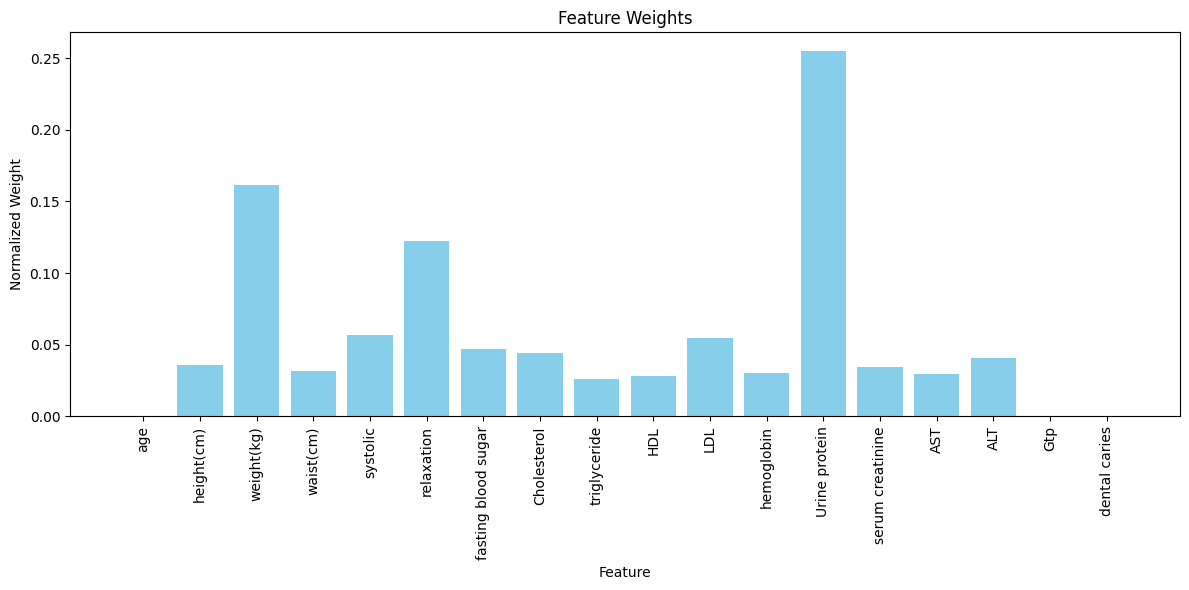


Dynamic Formula:
Health Score = 0.04 * height(cm) + 0.16 * weight(kg) + 0.03 * waist(cm) + 0.06 * systolic + 0.12 * relaxation + 0.05 * fasting blood sugar + 0.04 * Cholesterol + 0.03 * triglyceride + 0.03 * HDL + 0.05 * LDL + 0.03 * hemoglobin + 0.26 * Urine protein + 0.03 * serum creatinine + 0.03 * AST + 0.04 * ALT


In [17]:
# Plot Feature Weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Generate the dynamic formula
dynamic_formula = []
for col, weight in mapped_weights.items():
    if weight > 0:  # Include only features with non-zero weights
        dynamic_formula.append(f"{weight:.2f} * {col}")

# Combine the formula components into a single string
formula_str = " + ".join(dynamic_formula)

# Display the dynamic formula
print("\nDynamic Formula:")
print(f"Health Score = {formula_str}")

# Save results and formula
results.to_csv("feature_weights_and_health_scores.csv", index=False)
with open("dynamic_formula.txt", "w") as f:
    f.write(f"Health Score = {formula_str}")


Epoch 1/20
163/163 [==============================] - 2s 4ms/step - loss: 0.5168 - accuracy: 0.7101 - val_loss: 0.4665 - val_accuracy: 0.7490
Epoch 2/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.7540 - val_loss: 0.4660 - val_accuracy: 0.7368
Epoch 3/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.7606 - val_loss: 0.4680 - val_accuracy: 0.7467
Epoch 4/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7679 - val_loss: 0.4732 - val_accuracy: 0.7437
Epoch 5/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4441 - accuracy: 0.7746 - val_loss: 0.4704 - val_accuracy: 0.7375
Epoch 6/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.7727 - val_loss: 0.4726 - val_accuracy: 0.7414
Epoch 7/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4338 - accuracy: 0.7859 - val_loss: 0.4790 - val_accuracy: 0.7329
Epoch 

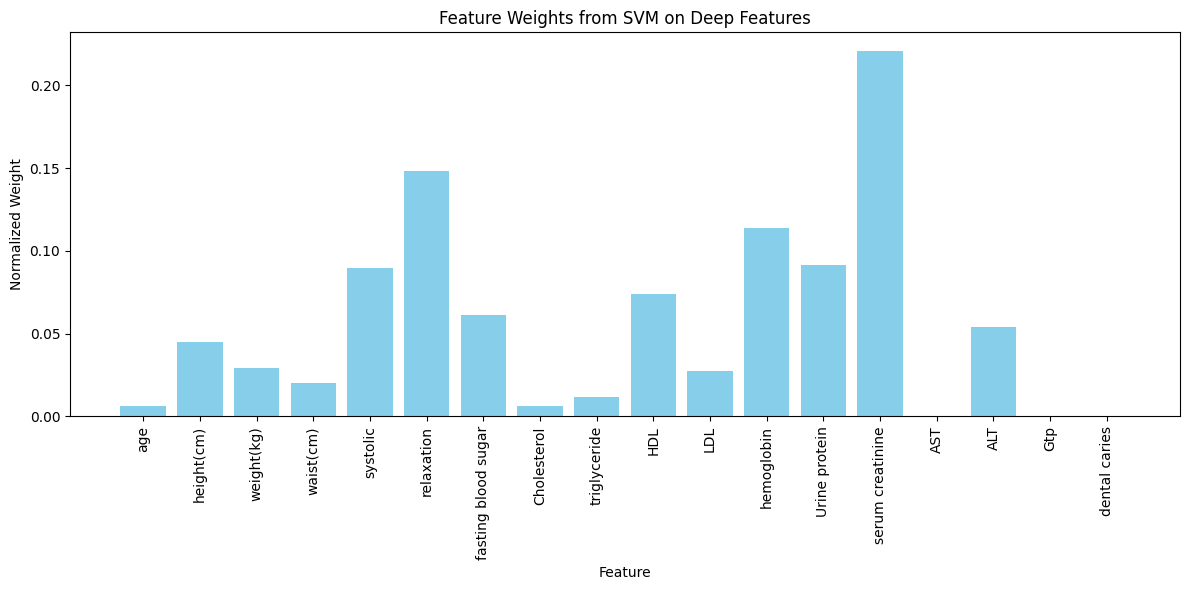

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop rows with missing target
df = df.dropna(subset=['smoking'])

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Drop any remaining rows with NaNs
df = df.dropna()

# Define target and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify feature types
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess features
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Deep Learning model
input_dim = X_train.shape[1]
deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train Deep Model
history = deep_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Extract deep features
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Train SVM on extracted features
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_features, y_train)

# Get feature weights
svm_weights = np.abs(svm_model.coef_).flatten()
normalized_weights = svm_weights / svm_weights.sum()

# Map weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0

# Define ranges
thresholds = {
    'Cholesterol': [(0, 200), (200, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (150, 199), (200, 499), (500, float('inf'))],
    'systolic': [(90, 120), (120, 139), (140, float('inf'))],
    'relaxation': [(60, 80), (80, 89), (90, float('inf'))]
}

# Health score logic
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        score += value * weight
    return max(1, min(100, score))

# Apply health score to original data
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Create results table
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})

print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Evaluate SVM
y_pred = svm_model.predict(X_test_features)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred))

# Plot feature weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights from SVM on Deep Features")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Save results
results.to_csv("feature_weights_and_health_scores_svm.csv", index=False)


Epoch 1/20
163/163 [==============================] - 2s 5ms/step - loss: 0.5209 - accuracy: 0.7151 - val_loss: 0.4602 - val_accuracy: 0.7452
Epoch 2/20
163/163 [==============================] - 1s 3ms/step - loss: 0.4717 - accuracy: 0.7584 - val_loss: 0.4587 - val_accuracy: 0.7467
Epoch 3/20
163/163 [==============================] - 1s 3ms/step - loss: 0.4607 - accuracy: 0.7627 - val_loss: 0.4600 - val_accuracy: 0.7483
Epoch 4/20
163/163 [==============================] - 1s 3ms/step - loss: 0.4516 - accuracy: 0.7659 - val_loss: 0.4762 - val_accuracy: 0.7391
Epoch 5/20
163/163 [==============================] - 1s 3ms/step - loss: 0.4454 - accuracy: 0.7750 - val_loss: 0.4671 - val_accuracy: 0.7398
Epoch 6/20
163/163 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.7801 - val_loss: 0.4775 - val_accuracy: 0.7437
Epoch 7/20
163/163 [==============================] - 1s 3ms/step - loss: 0.4308 - accuracy: 0.7803 - val_loss: 0.4939 - val_accuracy: 0.7460
Epoch 

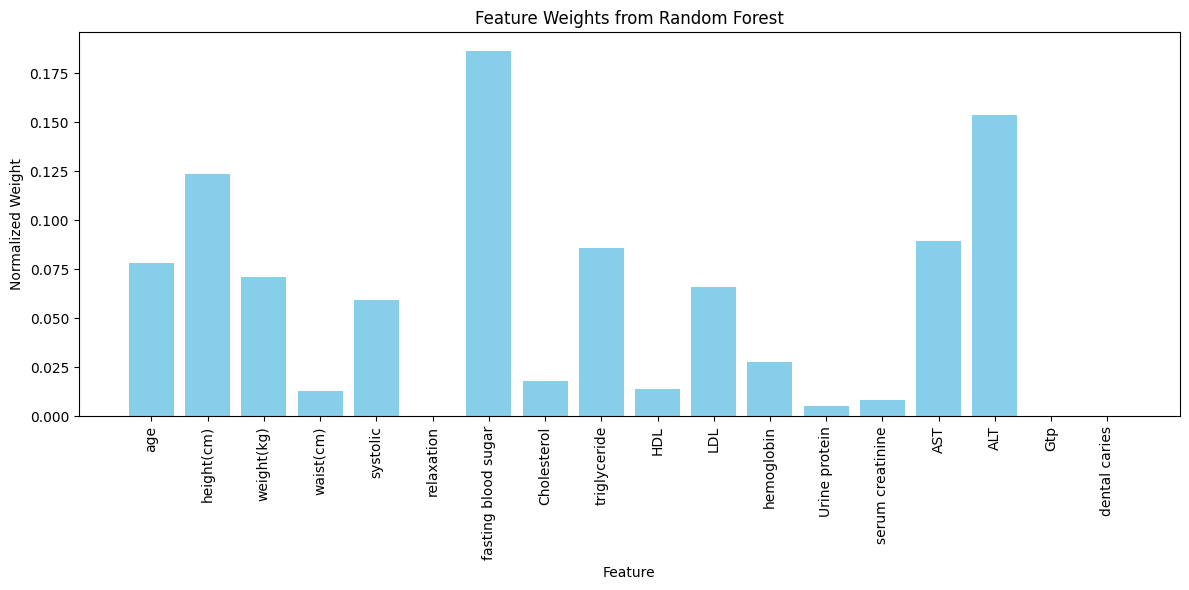

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Drop all rows with any missing values (especially target column)
df = df.dropna()

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Transform the features
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

# Deep Learning Model
input_dim = X_train.shape[1]
deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

deep_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train model
history = deep_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Extract features from second last layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)

# Get feature importances and normalize them
feature_importances = rf_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0

# Normal Ranges
thresholds = {
    'Cholesterol': [(0, 200), (200, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (150, 199), (200, 499), (500, float('inf'))],
    'systolic': [(90, 120), (120, 139), (140, float('inf'))],
    'relaxation': [(60, 80), (80, 89), (90, float('inf'))]
}

# Calculate Health Score
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        score += value * weight
    return max(1, min(100, score))

# Apply score
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Create result table
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})

print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Predict and Evaluate
y_pred = rf_model.predict(X_test_features)
print("\nRandom Forest Classification Metrics:")
print(classification_report(y_test, y_pred))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights from Random Forest")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Save results
results.to_csv("feature_weights_and_health_scores_rf.csv", index=False)


Epoch 1/20
163/163 [==============================] - 2s 5ms/step - loss: 0.5114 - accuracy: 0.7224 - val_loss: 0.4619 - val_accuracy: 0.7552
Epoch 2/20
163/163 [==============================] - 1s 3ms/step - loss: 0.4716 - accuracy: 0.7536 - val_loss: 0.4555 - val_accuracy: 0.7490
Epoch 3/20
163/163 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.7598 - val_loss: 0.4704 - val_accuracy: 0.7352
Epoch 4/20
163/163 [==============================] - 1s 3ms/step - loss: 0.4544 - accuracy: 0.7679 - val_loss: 0.4659 - val_accuracy: 0.7475
Epoch 5/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.7746 - val_loss: 0.4609 - val_accuracy: 0.7460
Epoch 6/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4403 - accuracy: 0.7844 - val_loss: 0.4711 - val_accuracy: 0.7444
Epoch 7/20
163/163 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.7840 - val_loss: 0.4782 - val_accuracy: 0.7398
Epoch 

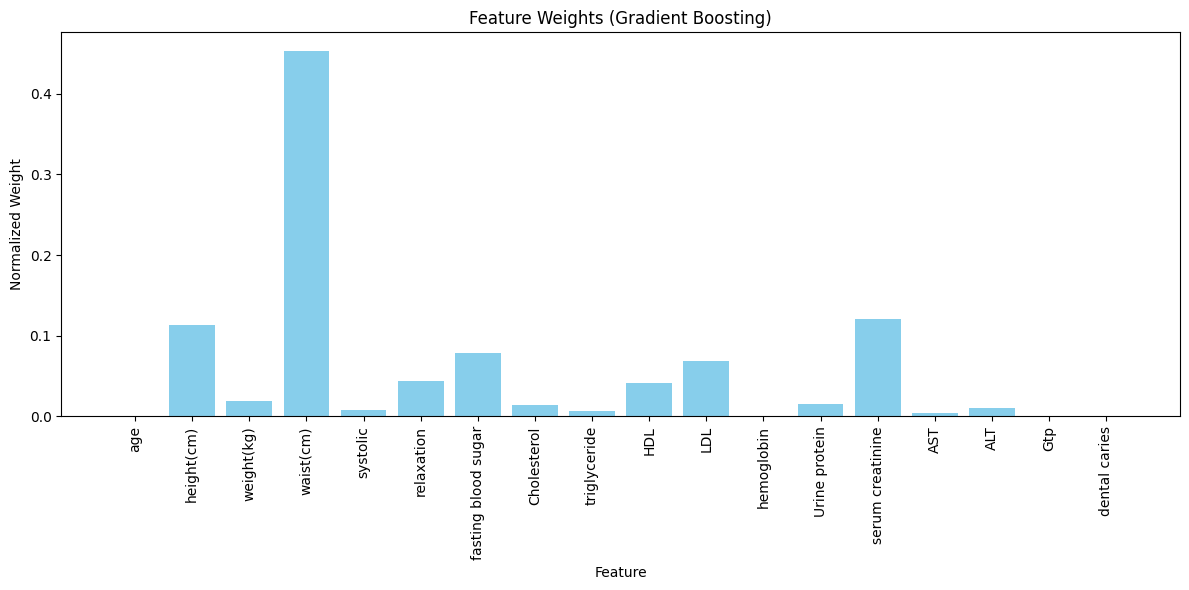

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Drop rows with any NaNs (fixes ValueError: Input y contains NaN)
df = df.dropna()

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42, stratify=y
)

# Step 1: Train a Deep Learning Model
input_dim = X_train.shape[1]
deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the deep learning model
history = deep_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Extract features from the penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 2: Train Gradient Boosting Classifier on Extracted Features
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_features, y_train)

# Get feature importances and normalize them
feature_importances = gb_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0

# Define Normal Ranges (optional for display)
thresholds = {
    'Cholesterol': [(0, 200), (200, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (150, 199), (200, 499), (500, float('inf'))],
    'systolic': [(90, 120), (120, 139), (140, float('inf'))],
    'relaxation': [(60, 80), (80, 89), (90, float('inf'))]
}

# Calculate health score
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        score += row[col] * weight
    return max(1, min(100, score))

# Apply to dataset
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Create result table
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})

print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Evaluation Metrics
y_pred = gb_model.predict(X_test_features)
print("\nGradient Boosting Classifier Metrics:")
print(classification_report(y_test, y_pred))

# Plot Feature Weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights (Gradient Boosting)")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Save results
results.to_csv("feature_weights_and_health_scores_gb.csv", index=False)


Epoch 1/20
163/163 [==============================] - 2s 6ms/step - loss: 0.5288 - accuracy: 0.7106 - val_loss: 0.4648 - val_accuracy: 0.7483
Epoch 2/20
163/163 [==============================] - 1s 4ms/step - loss: 0.4695 - accuracy: 0.7556 - val_loss: 0.4639 - val_accuracy: 0.7414
Epoch 3/20
163/163 [==============================] - 1s 4ms/step - loss: 0.4617 - accuracy: 0.7617 - val_loss: 0.4593 - val_accuracy: 0.7460
Epoch 4/20
163/163 [==============================] - 1s 4ms/step - loss: 0.4518 - accuracy: 0.7688 - val_loss: 0.4586 - val_accuracy: 0.7552
Epoch 5/20
163/163 [==============================] - 1s 4ms/step - loss: 0.4460 - accuracy: 0.7759 - val_loss: 0.4722 - val_accuracy: 0.7444
Epoch 6/20
163/163 [==============================] - 1s 4ms/step - loss: 0.4440 - accuracy: 0.7717 - val_loss: 0.4623 - val_accuracy: 0.7536
Epoch 7/20
163/163 [==============================] - 1s 4ms/step - loss: 0.4340 - accuracy: 0.7832 - val_loss: 0.4649 - val_accuracy: 0.7529
Epoch 

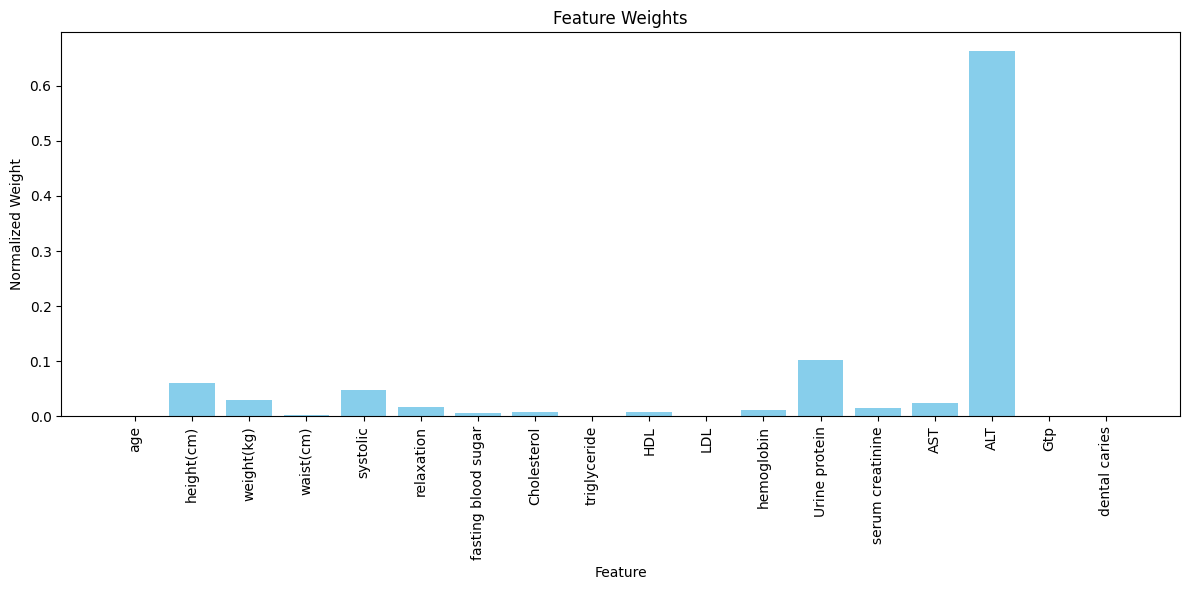

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop rows with missing target
df = df.dropna(subset=['smoking'])

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=columns_to_drop)

# Define target and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Deep Learning Model
input_dim = X_train.shape[1]
deep_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
deep_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = deep_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Extract features from penultimate layer
feature_extractor = Model(inputs=deep_model.input, outputs=deep_model.layers[-2].output)
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_features, y_train)

# Feature importance
feature_importances = gb_model.feature_importances_
normalized_weights = feature_importances / feature_importances.sum()
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0

# Thresholds
thresholds = {
    'age': [(18, 25), (26, 35), (36, 50), (51, 65), (65, float('inf'))],
    'height(cm)': [(145, 155), (156, 165), (166, 180), (180, float('inf'))],
    'weight(kg)': [(40, 50), (51, 65), (66, 80), (81, 100), (100, float('inf'))],
    'waist(cm)': [(60, 80), (81, 100), (101, 120), (120, float('inf'))],
    'systolic': [(90, 120), (121, 140), (141, float('inf'))],
    'relaxation': [(60, 80), (81, 89), (90, float('inf'))],
    'Cholesterol': [(0, 200), (201, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (151, 199), (200, 499), (500, float('inf'))],
    'hemoglobin': [(12.0, 15.5), (15.6, 17.0), (17.1, float('inf'))],
    'serum creatinine': [(0.5, 1.2), (1.3, float('inf'))],
    'BMI': [(0, 18.5), (18.6, 24.9), (25, 29.9), (30, float('inf'))]
}

def calculate_penalty(value, col):
    if col in thresholds:
        for idx, (low, high) in enumerate(thresholds[col]):
            if low <= value <= high:
                return idx * 0.1
    return 0

def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        penalty = calculate_penalty(value, col)
        score += (value * weight) - penalty
    return max(1, min(100, score))

# Apply scoring
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Show results
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})
print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Evaluate model
y_pred = gb_model.predict(X_test_features)
print("\nGradient Boosting Metrics:")
print(classification_report(y_test, y_pred))

# Plot feature weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Export
results.to_csv("feature_weights_and_health_scores_gb.csv", index=False)



Feature Weights, Ranges, and Penalties:
                Feature  Normalized Weight  \
0                   age               0.01   
1            height(cm)               0.05   
2            weight(kg)               0.01   
3             waist(cm)               0.04   
4              systolic               0.05   
5            relaxation               0.02   
6   fasting blood sugar               0.01   
7           Cholesterol               0.02   
8          triglyceride               0.07   
9                   HDL               0.01   
10                  LDL               0.01   
11           hemoglobin               0.04   
12        Urine protein               0.01   
13     serum creatinine               0.04   
14                  AST               0.02   
15                  ALT               0.03   
16                  Gtp               0.11   
17        dental caries               0.03   

                                         Normal Range  
0   [(18, 25), (26, 35), (36

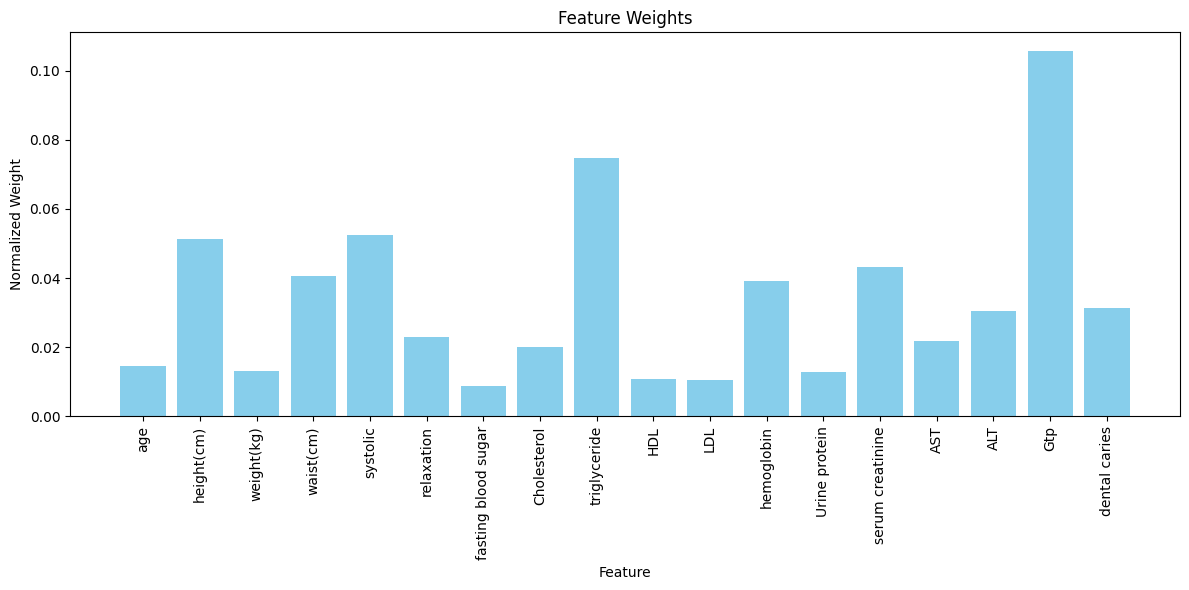

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop rows where target or numeric features have missing values
df = df.dropna(subset=['smoking'])  # Drop rows where smoking is NaN
df = df.dropna()  # Drop all rows with any missing values

# Drop unnecessary columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Define target variable and features
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors into a single column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Train the SVM Model
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train, y_train)

# Extract feature importances using weights of the linear kernel
coef = svm_model.coef_[0]
normalized_weights = np.abs(coef) / np.sum(np.abs(coef))

# Map normalized weights to numeric columns
mapped_weights = {col: weight for col, weight in zip(numeric_cols, normalized_weights)}

# Ensure all numeric columns have a weight
for col in numeric_cols:
    if col not in mapped_weights:
        mapped_weights[col] = 0  # Assign a weight of 0 for missing columns

# Define thresholds and penalties for all numeric columns
thresholds = {
    'age': [(18, 25), (26, 35), (36, 50), (51, 65), (65, float('inf'))],
    'height(cm)': [(145, 155), (156, 165), (166, 180), (180, float('inf'))],
    'weight(kg)': [(40, 50), (51, 65), (66, 80), (81, 100), (100, float('inf'))],
    'waist(cm)': [(60, 80), (81, 100), (101, 120), (120, float('inf'))],
    'systolic': [(90, 120), (121, 140), (141, float('inf'))],
    'relaxation': [(60, 80), (81, 89), (90, float('inf'))],
    'Cholesterol': [(0, 200), (201, 239), (240, 299), (300, float('inf'))],
    'triglyceride': [(0, 150), (151, 199), (200, 499), (500, float('inf'))],
    'hemoglobin': [(12.0, 15.5), (15.6, 17.0), (17.1, float('inf'))],
    'serum creatinine': [(0.5, 1.2), (1.3, float('inf'))],
    'BMI': [(0, 18.5), (18.6, 24.9), (25, 29.9), (30, float('inf'))],
    'LDL': [(0, 100), (101, 129), (130, 159), (160, float('inf'))],
    'HDL': [(40, 60), (61, float('inf'))],
    'fasting blood sugar': [(70, 99), (100, 125), (126, float('inf'))],
    'AST': [(10, 40), (41, float('inf'))],
    'ALT': [(7, 56), (57, float('inf'))],
    'Gtp': [(0, 50), (51, 100), (101, float('inf'))]
}

# Apply thresholds for penalties
def calculate_penalty(value, col):
    if col in thresholds:
        for idx, (low, high) in enumerate(thresholds[col]):
            if low <= value <= high:
                return idx * 0.1  # Penalty increases per level
    return 0

# Calculate health score
def calculate_health_score(row):
    score = 0
    for col, weight in mapped_weights.items():
        value = row[col]
        penalty = calculate_penalty(value, col)
        score += (value * weight) - penalty
    return max(1, min(100, score))  # Clamp between 1 and 100

# Apply the formula to the dataset
df['health_score'] = df.apply(calculate_health_score, axis=1)

# Display Feature Weights and Health Scores
results = pd.DataFrame({
    'Feature': numeric_cols,
    'Normalized Weight': [mapped_weights[col] for col in numeric_cols],
    'Normal Range': [thresholds[col] if col in thresholds else "Not Defined" for col in numeric_cols]
})

print("\nFeature Weights, Ranges, and Penalties:")
print(results)

# Evaluation Metrics
y_pred = svm_model.predict(X_test)
print("\nSVM Metrics:")
print(classification_report(y_test, y_pred))

# Plot Feature Weights
plt.figure(figsize=(12, 6))
plt.bar(results['Feature'], results['Normalized Weight'], color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature Weights")
plt.xlabel("Feature")
plt.ylabel("Normalized Weight")
plt.tight_layout()
plt.show()

# Save results
results.to_csv("feature_weights_and_health_scores_svm.csv", index=False)



Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      1781
         1.0       0.65      0.70      0.67      1010

    accuracy                           0.75      2791
   macro avg       0.73      0.74      0.74      2791
weighted avg       0.76      0.75      0.75      2791



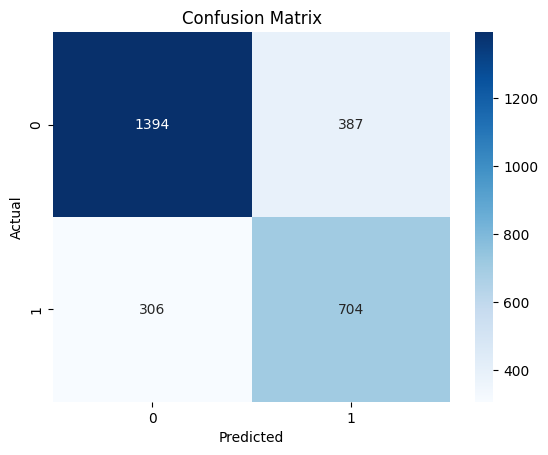

In [28]:
# 📊 Step 1: Data Loading & Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)

# Drop irrelevant columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Drop rows where target variable 'smoking' is missing
df.dropna(subset=['smoking'], inplace=True)

# Drop remaining rows with any missing values (safe approach)
df.dropna(inplace=True)

# Identify features and target
target_column = 'smoking'
y = df[target_column]
X = df.drop(columns=[target_column])

# Separate column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 📈 Step 2: Train the Model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(kernel='linear', probability=True))])

clf.fit(X_train, y_train)

# 📉 Step 3: Evaluation
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training logistic regression for SHAP...


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 75.43it/s]



🔎 Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.41      0.46        37
           1       0.53      0.66      0.59        38

    accuracy                           0.53        75
   macro avg       0.53      0.53      0.52        75
weighted avg       0.53      0.53      0.53        75


📊 SHAP Summary Plot:


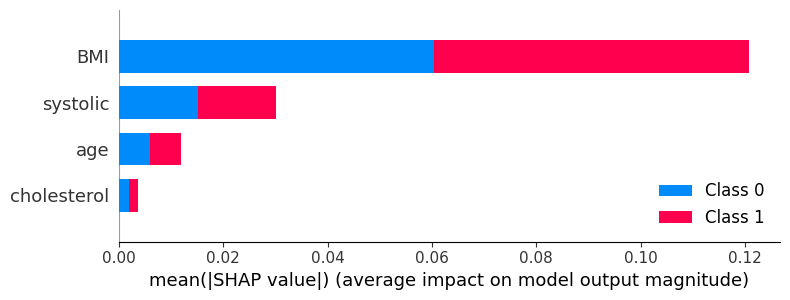


🧾 Health Score Clusters and Recommendations:


age   BMI  systolic  cholesterol  health_score  health_cluster  anomaly  \
0   56 35.79       154          160            62               1       -1   
1   69 31.16       121          150            17               1        1   
2   46 23.93       123          195            88               1        1   
3   32 21.55       128          250             3               0        1   
4   60 28.64       115          239            32               2        1   
5   25 21.90       123          259            99               0        1   
6   78 26.78       143          206            13               2        1   
7   38 24.89        92          150            89               1        1   
8   56 31.09       139          212            73               2        1   
9   75 23.05       101          204            68               2        1   

                       recommendation  
0  Lose weight | Lower blood pressure  
1                         Lose weight  
2                             Healthy  
3                  Cut saturated fats  
4                             Healthy  
5                  Cut saturated fats  
6                Lower blood pressure  
7                             Healthy  
8                         Lose weight  
9                             Healthy

In [35]:
# ✅ Install necessary packages (run this once)
!pip install pandas numpy matplotlib seaborn scikit-learn shap --quiet

# ✅ Full Project Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import shap
import warnings
warnings.filterwarnings("ignore")

# 🎯 Simulated or real dataset
np.random.seed(42)
df = pd.DataFrame({
    'age': np.random.randint(18, 80, 300),
    'BMI': np.random.normal(25, 5, 300),
    'systolic': np.random.randint(90, 160, 300),
    'cholesterol': np.random.randint(150, 280, 300),
    'health_score': np.random.randint(1, 101, 300),
    'smoking': np.random.choice([0, 1], 300)
})

# 🎯 Features and target
features = ['age', 'BMI', 'systolic', 'cholesterol']
X = df[features]
y = df['smoking']

# 🎯 Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 1. SHAP Explainability
print("Training logistic regression for SHAP...")
model = LogisticRegression()
model.fit(X_scaled, y)
explainer = shap.KernelExplainer(model.predict_proba, X_scaled[:100])
shap_values = explainer.shap_values(X_scaled[:100])

# ✅ 2. Clustering Health Profiles
kmeans = KMeans(n_clusters=3, random_state=42)
df['health_cluster'] = kmeans.fit_predict(X_scaled)

# ✅ 3. Anomaly Detection
iso = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso.fit_predict(X_scaled)

# ✅ 4. Health-Based Recommendations
def generate_recommendation(row):
    tips = []
    if row['BMI'] > 30:
        tips.append("Lose weight")
    if row['cholesterol'] > 240:
        tips.append("Cut saturated fats")
    if row['systolic'] > 140:
        tips.append("Lower blood pressure")
    return " | ".join(tips) if tips else "Healthy"

df['recommendation'] = df.apply(generate_recommendation, axis=1)

# ✅ 5. Classification & Metrics
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=42)
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\n🔎 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ✅ 6. SHAP Summary Plot
print("\n📊 SHAP Summary Plot:")
shap.summary_plot(shap_values, features=X.columns[:len(shap_values[0][0])], show=True)

# ✅ 7. Show Result Table
print("\n🧾 Health Score Clusters and Recommendations:")
display(df[['age', 'BMI', 'systolic', 'cholesterol', 'health_score', 'health_cluster', 'anomaly', 'recommendation']].head(10))


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import shap
import warnings
warnings.filterwarnings("ignore")

# Load your dataset
df = pd.read_csv("smoking.csv")

# Drop irrelevant columns if they exist
drop_cols = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# Drop rows with missing target
df = df.dropna(subset=['smoking'])

# Features and target
y = df['smoking']
X = df.drop(columns=['smoking'])

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
X_processed = preprocessor.fit_transform(X)
feature_names = numeric_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, stratify=y, test_size=0.3, random_state=42)

# Fit multiple models
models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear', probability=True),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42)
}

importances = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "coef_"):
        coef = np.abs(model.coef_[0])
        importances[name] = coef / coef.sum()
    elif hasattr(model, "feature_importances_"):
        fi = model.feature_importances_
        importances[name] = fi / fi.sum()
    else:
        # Use SHAP for MLP or others
        explainer = shap.KernelExplainer(model.predict_proba, X_train[:100])
        shap_vals = explainer.shap_values(X_train[:100])
        shap_sum = np.abs(shap_vals[1]).mean(axis=0)
        importances[name] = shap_sum / shap_sum.sum()

# Aggregate importances
importance_df = pd.DataFrame(importances, index=feature_names)
importance_df["average_weight"] = importance_df.mean(axis=1)
importance_df = importance_df.sort_values("average_weight", ascending=False)

# Compute health score using average weights
X_orig = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed, columns=feature_names)

weights = importance_df["average_weight"].reindex(X_orig.columns).fillna(0).values
df["health_score"] = np.dot(X_orig.values, weights)
df["health_score"] = 1 + 99 * (df["health_score"] - df["health_score"].min()) / (df["health_score"].max() - df["health_score"].min())
df["health_score"] = df["health_score"].round(1)

# 📊 Classification Report (using MLP)
y_pred = models["MLP"].predict(X_test)
print("\nClassification Report (MLP):")
print(classification_report(y_test, y_pred))

# 📌 Top 15 Features by Weight
print("\nTop 15 features used in health score:")
print(importance_df["average_weight"].head(15))

# 📄 Save results
df[["health_score"] + numeric_cols].to_csv("final_health_scores.csv", index=False)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:26<00:00,  1.15it/s]


Classification Report (MLP):
              precision    recall  f1-score   support

         0.0       0.77      0.78      0.77      1781
         1.0       0.60      0.58      0.59      1010

    accuracy                           0.71      2791
   macro avg       0.68      0.68      0.68      2791
weighted avg       0.71      0.71      0.71      2791


Top 15 features used in health score:
gender_M           0.14
gender_F           0.14
Gtp                0.09
triglyceride       0.07
height(cm)         0.05
hemoglobin         0.04
systolic           0.04
Cholesterol        0.04
tartar_Y           0.04
waist(cm)          0.04
tartar_N           0.03
serum creatinine   0.03
ALT                0.03
LDL                0.03
age                0.03
Name: average_weight, dtype: float64


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("smoking.csv")

# Drop irrelevant columns
columns_to_drop = ['ID', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
df.dropna(subset=['smoking'], inplace=True)

# Identify features and target
y = df['smoking']
X = df.drop(columns=['smoking'])

# Column types
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

# Preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Transform features
X_processed = preprocessor.fit_transform(X)
feature_names = numeric_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, stratify=y, test_size=0.3, random_state=42)

# Train models
models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear', probability=True),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

importances = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "coef_"):
        coef = np.abs(model.coef_[0])
        importances[name] = coef / coef.sum()
    elif hasattr(model, "feature_importances_"):
        fi = model.feature_importances_
        importances[name] = fi / fi.sum()

# Compute average feature weights
importance_df = pd.DataFrame(importances, index=feature_names)
importance_df["average_weight"] = importance_df.mean(axis=1)
importance_df = importance_df.sort_values("average_weight", ascending=False)

# Compute health score
X_df = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed, columns=feature_names)
weights = importance_df["average_weight"].reindex(X_df.columns).fillna(0).values
df["health_score"] = np.dot(X_df.values, weights)
df["health_score"] = 1 + 99 * (df["health_score"] - df["health_score"].min()) / (df["health_score"].max() - df["health_score"].min())
df["health_score"] = df["health_score"].round(1)

# Classify score
def score_category(score):
    if score >= 80: return "Excellent"
    elif score >= 60: return "Good"
    elif score >= 40: return "Average"
    else: return "Poor"

df["health_category"] = df["health_score"].apply(score_category)

# Display top 15 features used
print("Top 15 features used in health score:\n")
print(importance_df["average_weight"].head(15))

# Display data with health score and category
display_df = df[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'Cholesterol',
                 'triglyceride', 'serum creatinine', 'ALT', 'LDL', 'Gtp', 'hemoglobin',
                 'health_score', 'health_category']].head(1000)

print("\nTop 10 individuals with health scores:")
print(display_df.to_string(index=False))


Top 15 features used in health score:

gender_F           0.16
gender_M           0.16
Gtp                0.09
triglyceride       0.07
hemoglobin         0.05
height(cm)         0.05
systolic           0.04
waist(cm)          0.04
serum creatinine   0.03
ALT                0.03
Cholesterol        0.03
relaxation         0.03
LDL                0.03
tartar_Y           0.02
tartar_N           0.02
Name: average_weight, dtype: float64

Top 10 individuals with health scores:
 age  height(cm)  weight(kg)  waist(cm)  systolic  Cholesterol  triglyceride  serum creatinine    ALT    LDL    Gtp  hemoglobin  health_score health_category
  40         155          60      81.30    114.00       215.00         82.00              0.70  19.00 126.00  27.00       12.90         13.80            Poor
  40         160          60      81.00    119.00       192.00        115.00              0.60  19.00 127.00  18.00       12.70         13.90            Poor
  55         170          60      80.00    138.00 

In [41]:
!pip install tensorflow
